# Afisha Perfomance  — исследование пользовательской активности и сезонных трендов 2024

- Автор: Сорокин Елисей 

## Цель и задачи  

**Цель:** Провести исследовательский анализ пользовательских данных сервиса Яндекс Афиша за лето и осень 2024 года, чтобы:

- Выявить изменения в пользовательских предпочтениях и активности;
- Изучить сезонные колебания популярности мероприятий;
- Оценить поведение пользователей в зависимости от типа устройства;
- Выявить ключевых партнёров, событийные категории и регионы, формирующие основную выручку;
- Проверить гипотезы о различиях между пользователями мобильных и стационарных устройств.


**Задачи:**

**Шаг 0. Подготовка проекта**

- Оформить структуру проекта в Jupyter Notebook.
- Описать цели, задачи и структуру анализа.
- Кратко представить описание и состав данных.

**Шаг 1. Знакомство с данными и первичная предобработка**

- Загрузить все предоставленные датасеты.
- Проверить корректность выгрузки и соответствие типов данных.
- Оценить наличие пропусков, дубликатов и аномалий.
- Сделать первичный обзор данных и сформулировать гипотезы для анализа.

**Шаг 2. Предобработка данных**

- 2.1.Привести данные к единому формату

    - преобразовать даты и числовые типы;
    - обработать пропущенные значения и ошибки в категориальных данных;
    - устранить дубликаты (в том числе неявные).


- 2.2. Создать новые признаки

    - выручка в рублях;
    - выручка с одного билета;
    - месяц заказа;
    - сезон оформления заказа.


- 2.3. Разделить данные по валюте (рубли и тенге), учесть конвертацию для анализа.

**Шаг 3. Исследовательский анализ данных**

- 3.1. Анализ пользовательских предпочтений

    - Оценить динамику заказов по месяцам и сезонам.
    - Изучить распределение заказов по:
        - типам мероприятий;
        - устройствам (мобильные / десктопные);
        - возрастным категориям.
    - Сравнить летние и осенние сезоны по доле заказов в каждой категории.


- 3.2. Стоимость билетов

    - Рассчитать среднюю выручку с одного билета.
    - Проанализировать изменение средней стоимости билета по категориям мероприятий летом и осенью.
    
    
- 3.3.Активность пользователей осенью

    - Построить метрики по дням: число заказов, DAU, средние чеки, заказы на пользователя.
    - Оценить недельную цикличность (будни/выходные).
    - Сделать выводы о поведении пользователей в осенний период.


- 3.4. Популярные события, регионы и партнёры

    - Оценить количество мероприятий, заказов и выручку по регионам.
    - Выявить топ-организаторов и билетных партнёров по числу событий, заказов и суммарной выручке.
    - Проанализировать их вклад в общую активность платформы.
       
**Шаг 4. Статистический анализ**
- Проверить 2 гипотезы:
    - Пользователи мобильных устройств оформляют больше заказов.
    - У них больше интервал между заказами.
- Обосновать выбор статистического теста.
- Провести проверку гипотез и интерпретировать результаты.


**Шаг 5. Итоговый вывод и рекомендации**

- Подвести итоги анализа.
- Выделить ключевые инсайты и бизнес-перспективы.
- Дать рекомендации по продуктовой стратегии:
    - развитие мобильного направления;
    - фокус на популярных категориях мероприятий;
    - поддержка лидирующих партнёров и регионов.
    
---

## Данные

Для анализа пользовательской активности и поведения на сайте Afisha использовались три датасета. Два из них являются основными — они содержат информацию о заказах билетов и о мероприятиях. Один дополнительный датасет содержит информацию о курсе валют и используется для корректной обработки выручки.

- **Основные:**

    - `final_tickets_orders_df.csv` - Содержит информацию обо всех заказах билетов, совершённых пользователями с мобильных и стационарных устройств.
    - `final_tickets_events_df.csv`- Содержит информацию о событиях: от города проведения и типа мероприятия до названия площадки.


- **Дополнительные:**

    - `final_tickets_tenge_df.csv` - Содержит информацию о курсе тенге к рублю в 2024 году и используется для конвертации валюты.


### Описание датасета `final_tickets_orders_df.csv`

- `order_id` — уникальный идентификатор заказа.
- `user_id` — уникальный идентификатор пользователя.
- `created_dt_msk` — дата создания заказа (МСК).
- `created_ts_msk` — дата и время создания заказа (МСК).
- `event_id` — идентификатор мероприятия.
- `cinema_circuit` —сеть кинотеатров; если не применимо — значение 'нет'.
- `age_limit` — возрастное ограничение мероприятия.
- `currency_code` — валюта оплаты (rub или kzt).
- `device_type_canonical` — тип устройства: mobile или desktop.
- `revenue` — выручка от заказа.
- `service_name` — название билетного сервиса.
- `tickets_count` — количество купленных билетов.
- `total` — общая сумма заказа.
- `days_since_prev` —  количество дней с предыдущей покупки пользователя (может быть пропуск, если покупка первая).


### Описание датасета `final_tickets_events_df.csv`

- `event_id` — уникальный идентификатор мероприятия.
- `event_name` —  название мероприятия.
- `event_type_description` — описание типа мероприятия.
- `event_type_main` — основной тип мероприятия (театр, концерт и др.).
- `organizers` — организаторы мероприятия.
- `region_name` — регион проведения.
- `city_name` — город проведения.
- `city_id` — уникальный идентификатор города проведения.
- `venue_id` — уникальный идентификатор площадки.
- `venue_name` — название площадки.
- `venue_address` — адрес площадки.


### Описание датасета `final_tickets_tenge_df.csv`

- `nominal` — номинал валюты (100 тенге).
- `data` —  дата курса.
- `curs` — курс тенге к рублю на указанную дату.
- `cdx` —  код валюты (kzt).


## Содержимое проекта

0. Подготовка проекта
1. Знакомство с данными: загрузка и первичная предобработка.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Статистический анализ.
5. Итоговый вывод и рекомендации

---

## Знакомство с данными: загрузка и первичная предобработка

### Вывод общей информации

**Импортируем библиотеки**

In [76]:
import os
import pandas as pd 
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt 
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportion_effectsize
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows', 100)


**Загружаем все данные по проекту.**

In [2]:
orders_path_local = 'data/orders.csv'
orders_path_server = 'https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv'

events_path_local = 'data/events.csv'
events_path_server = 'https://code.s3.yandex.net/datasets/final_tickets_events_df.csv'

tenge_path_local = 'data/tenge.csv'
tenge_path_server = 'https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv'

def safe_read_csv(local_path, server_path, index_col=None):
    try:
        if os.path.exists(local_path):
            return pd.read_csv(local_path, index_col=index_col)
        else:
            return pd.read_csv(server_path, index_col=index_col)
    except Exception as e:
        print(f'Ошибка при загрузке данных из {local_path} или {server_path}: {e}')
        return None

orders_df = safe_read_csv(orders_path_local, orders_path_server)
events_df = safe_read_csv(events_path_local, events_path_server)
tenge_df = safe_read_csv(tenge_path_local, tenge_path_server)

---
**Выводим данные** 

**Orders**

In [3]:
orders_df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


In [4]:
orders_df.tail()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
290844,368620,fffcd3dde79eb2c,2024-10-27,2024-10-27 18:00:57,33189,нет,6,rub,mobile,965.57,Весь в билетах,4,9655.73,0.0
290845,368562,fffcd3dde79eb2c,2024-10-27,2024-10-27 17:53:53,33189,нет,6,rub,mobile,1448.36,Весь в билетах,6,14483.60,0.0
290846,8473772,fffcd3dde79eb2c,2024-10-30,2024-10-30 13:37:43,205231,нет,16,rub,desktop,178.95,Прачечная,2,4473.74,3.0
290847,5526067,fffeeb3c120cf0b,2024-09-24,2024-09-24 10:07:42,454526,нет,18,rub,desktop,661.53,Билеты без проблем,2,6615.34,NaN
290848,813654,ffff00725179321,2024-09-25,2024-09-25 15:12:40,284965,нет,16,rub,mobile,802.25,Мой билет,2,8913.92,NaN


In [5]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

In [6]:
dup_orders = orders_df.duplicated(subset = ['order_id', 'user_id','event_id'], keep = False).sum()
dup_orders

np.int64(0)

---
**Events**

In [7]:
events_df.head()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [8]:
events_df.tail()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
22422,591313,196f51a8-344a-462a-b806-a8467fd0e5fa,спортивное мероприятие,спорт,№1623,Речиновская область,Дальнесветск,65,3721,"Студия графики ""Оттенок"" Инк","ул. Чапаева, д. 8 стр. 1/3"
22423,591859,b2b83233-f861-496c-b6fb-a4fef347deb1,ёлка,ёлки,№1992,Солнечноземская область,Глинополье,56,3005,"Арт-кафе ""Аксессуар"" Лимитед","бул. Логовой, д. 94 к. 1/5"
22424,591877,6bffa2da-51d1-4cfe-accb-a02e617a8180,событие,другое,№1767,Североключевской округ,Ягодинска,21702,3506,"Клуб современных танцев ""Кофе"" Групп","ш. Тупиковое, д. 49 стр. 73"
22425,592322,9283cb32-2750-43cd-b57e-dde9ccd5552e,событие,другое,№3884,Яблоневская область,Светополье,39,1081,"Искусственная сцена ""Краски"" и партнеры","пер. Р.Люксембург, д. 499 к. 997"
22426,592325,f4952452-27ff-4d03-9adb-f7836430f83b,событие,другое,№3884,Яблоневская область,Светополье,39,1081,"Искусственная сцена ""Краски"" и партнеры","пер. Р.Люксембург, д. 499 к. 997"


In [9]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


In [10]:
dup_events = events_df.duplicated(subset = ['event_id', 'city_id','venue_id'], keep = False).sum()
dup_events

np.int64(0)

---
**Tenge**

In [11]:
tenge_df.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [12]:
tenge_df.tail()

,data,nominal,curs,cdx
352,2024-12-27,100,19.2705,kzt
353,2024-12-28,100,19.5105,kzt
354,2024-12-29,100,19.4860,kzt
355,2024-12-30,100,19.4860,kzt
356,2024-12-31,100,19.4860,kzt


In [13]:
tenge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


### Вывод по знакомству с данными 

- **Датасет `final_tickets_orders_df.csv`**
    - Объем: 290 849 строки, 14 столбцов.
    - Пропуски: Обнаружены пропущенные значения в столбце `days_since_prev`, что объясняется отсутствием предыдущих покупок у части пользователей. Это логично и не требует удаления строк.
    - Типы данных: 
        - Даты (`created_dt_msk`, `created_ts_msk`) нужно привести к datetime.
        - Числовые (`order_id`,`event_id`, `age_limit`, `revenue`, `tickets_count`,`total`, `days_since_prev`) нужно преобразовать в оптимальный размер, если возможно.
    - Дубликаты: Повторяющихся строк не обнаружено 


- **Датасет `final_tickets_events_df.csv`**
    - Объём: 22 427 строк, 11 столбцов.
    - Пропуски: Отсутствуют.
    - Типы данных:
        - Числовые (`event_id`, `city_id`, `venue_id`) нужно преобразовать в оптимальный размер, если возможно.
    - Дубликаты: Не выявлены.


- **Датасет `final_tickets_tenge_df.csv`**
    - Объём: 357 строк, 4 столбца.
    - Пропуски: Отсутствуют.
    - Типы данных:
        - Столбец data представлен в виде object, требуется преобразование в тип datetime.
        - Остальные столбцы соответствуют по типу, возможна оптимизация хранения числовых значений.
    - Дубликаты: Повторов строк не обнаружено.

---
## Предобработка данных

### Объединение данных в единый датафрейм

In [14]:
df = orders_df.merge(events_df, on = 'event_id', how = 'left')

In [15]:
df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4"
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6"
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8"
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8"


In [16]:
df.tail()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
290844,368620,fffcd3dde79eb2c,2024-10-27,2024-10-27 18:00:57,33189,нет,6,rub,mobile,965.57,Весь в билетах,4,9655.73,0.0,e3dcdb45-9eaa-4ce4-9b85-1562e548172e,цирковое шоу,другое,№1823,Каменевский регион,Глиногорск,213.0,3952.0,"Творческое объединение ""Модуль"" Инкорпорэйтед","алл. Глинки, д. 9/8 к. 67"
290845,368562,fffcd3dde79eb2c,2024-10-27,2024-10-27 17:53:53,33189,нет,6,rub,mobile,1448.36,Весь в билетах,6,14483.60,0.0,e3dcdb45-9eaa-4ce4-9b85-1562e548172e,цирковое шоу,другое,№1823,Каменевский регион,Глиногорск,213.0,3952.0,"Творческое объединение ""Модуль"" Инкорпорэйтед","алл. Глинки, д. 9/8 к. 67"
290846,8473772,fffcd3dde79eb2c,2024-10-30,2024-10-30 13:37:43,205231,нет,16,rub,desktop,178.95,Прачечная,2,4473.74,3.0,74883818-57a6-494a-b162-bb0260877cbf,спектакль,театр,№4837,Каменевский регион,Глиногорск,213.0,3470.0,"Клуб киноманов ""Верность"" Лтд","пр. Титова, д. 5 стр. 68"
290847,5526067,fffeeb3c120cf0b,2024-09-24,2024-09-24 10:07:42,454526,нет,18,rub,desktop,661.53,Билеты без проблем,2,6615.34,NaN,6f4c6a50-0106-407b-8f54-332c740b01da,шоу,стендап,№998,Широковская область,Ягодиновка,239.0,2449.0,"Гильдия художников ""Флит"" Инк","пр. Макарова, д. 4"
290848,813654,ffff00725179321,2024-09-25,2024-09-25 15:12:40,284965,нет,16,rub,mobile,802.25,Мой билет,2,8913.92,NaN,58574140-962c-49a3-af70-b773a05661a3,концерт,концерты,№2170,Малиновоярский округ,Верховино,197.0,4113.0,"Мастерская живого действия ""Гардероб"" Лимитед","ш. 30 лет Победы, д. 38 стр. 664"


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290849 non-null  int64  
 1   user_id                 290849 non-null  object 
 2   created_dt_msk          290849 non-null  object 
 3   created_ts_msk          290849 non-null  object 
 4   event_id                290849 non-null  int64  
 5   cinema_circuit          290849 non-null  object 
 6   age_limit               290849 non-null  int64  
 7   currency_code           290849 non-null  object 
 8   device_type_canonical   290849 non-null  object 
 9   revenue                 290849 non-null  float64
 10  service_name            290849 non-null  object 
 11  tickets_count           290849 non-null  int64  
 12  total                   290849 non-null  float64
 13  days_since_prev         268909 non-null  float64
 14  event_name          

### Работа с пропусками 

In [18]:
df.isna().sum()

order_id                      0
user_id                       0
created_dt_msk                0
created_ts_msk                0
event_id                      0
cinema_circuit                0
age_limit                     0
currency_code                 0
device_type_canonical         0
revenue                       0
service_name                  0
tickets_count                 0
total                         0
days_since_prev           21940
event_name                  238
event_type_description      238
event_type_main             238
organizers                  238
region_name                 238
city_name                   238
city_id                     238
venue_id                    238
venue_name                  238
venue_address               238
dtype: int64

In [19]:
df = df[df.drop(columns='days_since_prev').notnull().all(axis=1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290611 entries, 0 to 290848
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290611 non-null  int64  
 1   user_id                 290611 non-null  object 
 2   created_dt_msk          290611 non-null  object 
 3   created_ts_msk          290611 non-null  object 
 4   event_id                290611 non-null  int64  
 5   cinema_circuit          290611 non-null  object 
 6   age_limit               290611 non-null  int64  
 7   currency_code           290611 non-null  object 
 8   device_type_canonical   290611 non-null  object 
 9   revenue                 290611 non-null  float64
 10  service_name            290611 non-null  object 
 11  tickets_count           290611 non-null  int64  
 12  total                   290611 non-null  float64
 13  days_since_prev         268698 non-null  float64
 14  event_name              2

In [20]:
df.isna().sum()

order_id                      0
user_id                       0
created_dt_msk                0
created_ts_msk                0
event_id                      0
cinema_circuit                0
age_limit                     0
currency_code                 0
device_type_canonical         0
revenue                       0
service_name                  0
tickets_count                 0
total                         0
days_since_prev           21913
event_name                    0
event_type_description        0
event_type_main               0
organizers                    0
region_name                   0
city_name                     0
city_id                       0
venue_id                      0
venue_name                    0
venue_address                 0
dtype: int64

### Преобразование типов данных

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290611 entries, 0 to 290848
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290611 non-null  int64  
 1   user_id                 290611 non-null  object 
 2   created_dt_msk          290611 non-null  object 
 3   created_ts_msk          290611 non-null  object 
 4   event_id                290611 non-null  int64  
 5   cinema_circuit          290611 non-null  object 
 6   age_limit               290611 non-null  int64  
 7   currency_code           290611 non-null  object 
 8   device_type_canonical   290611 non-null  object 
 9   revenue                 290611 non-null  float64
 10  service_name            290611 non-null  object 
 11  tickets_count           290611 non-null  int64  
 12  total                   290611 non-null  float64
 13  days_since_prev         268698 non-null  float64
 14  event_name              2

In [22]:
date_columns = ['created_dt_msk', 'created_ts_msk']
for column in date_columns:
    df[column] = pd.to_datetime(df[column], errors='coerce')
    
tenge_df['data'] = pd.to_datetime(tenge_df['data'], errors='coerce')

In [23]:
int_columns = ['order_id', 'event_id', 'age_limit', 'city_id', 'venue_id', 'tickets_count']
for column in int_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce', downcast = 'integer')
tenge_df['nominal'] = pd.to_numeric(tenge_df['nominal'], errors='coerce', downcast = 'integer')

In [24]:
float_columns = ['revenue', 'total']
for column in float_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce', downcast = 'float')
tenge_df['curs'] = pd.to_numeric(tenge_df['curs'], errors='coerce', downcast = 'float')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290611 entries, 0 to 290848
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290611 non-null  int32         
 1   user_id                 290611 non-null  object        
 2   created_dt_msk          290611 non-null  datetime64[ns]
 3   created_ts_msk          290611 non-null  datetime64[ns]
 4   event_id                290611 non-null  int32         
 5   cinema_circuit          290611 non-null  object        
 6   age_limit               290611 non-null  int8          
 7   currency_code           290611 non-null  object        
 8   device_type_canonical   290611 non-null  object        
 9   revenue                 290611 non-null  float64       
 10  service_name            290611 non-null  object        
 11  tickets_count           290611 non-null  int8          
 12  total                   290611 non-

### Работа с дубликатами 

In [26]:
full_duplicates = df.duplicated(keep=False).value_counts()
display(full_duplicates)

False    290611
Name: count, dtype: int64

In [27]:
columns_to_check = [col for col in df.columns if col != 'order_id']

duplicates = df.duplicated(subset=columns_to_check, keep=False).value_counts()
display(duplicates)

False    290553
True         58
Name: count, dtype: int64

In [28]:
df = df.drop_duplicates(subset=columns_to_check, keep=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290553 entries, 0 to 290848
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290553 non-null  int32         
 1   user_id                 290553 non-null  object        
 2   created_dt_msk          290553 non-null  datetime64[ns]
 3   created_ts_msk          290553 non-null  datetime64[ns]
 4   event_id                290553 non-null  int32         
 5   cinema_circuit          290553 non-null  object        
 6   age_limit               290553 non-null  int8          
 7   currency_code           290553 non-null  object        
 8   device_type_canonical   290553 non-null  object        
 9   revenue                 290553 non-null  float64       
 10  service_name            290553 non-null  object        
 11  tickets_count           290553 non-null  int8          
 12  total                   290553 non-

### Создание новых столбцов

In [29]:
rub_df = df.merge(tenge_df, how = 'left', left_on = 'created_dt_msk', right_on = 'data')

In [30]:
def create_revenue_rub(rub_df):
    kzt_mask = rub_df['currency_code'] == 'kzt'
    rub_df['revenue_rub'] = rub_df['revenue']
    rub_df.loc[kzt_mask, 'revenue_rub'] = (rub_df.loc[kzt_mask, 'revenue'] / rub_df.loc[kzt_mask, 'nominal']) * rub_df.loc[kzt_mask, 'curs']
    return rub_df

rub_df = create_revenue_rub(rub_df)

In [31]:
rub_df['one_ticket_revenue_rub'] = rub_df['revenue_rub'] / rub_df['tickets_count']

In [32]:
rub_df['month'] = rub_df['created_dt_msk'].dt.month

In [33]:
rub_df['season'] = rub_df['month'].apply(
    lambda month: (
        'зима' if month in [12, 1, 2]
        else 'весна' 
        if month in [3, 4, 5]
        else 'лето' 
        if month in [6, 7, 8]
        else 'осень'
    )
)

In [34]:
rub_df['month'] = pd.to_numeric(rub_df['month'], errors='coerce', downcast = 'integer')

In [35]:
rub_df.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,100,18.697201,kzt,1521.94,380.4850,8,лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213,2941,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,100,18.341900,kzt,289.45,144.7250,7,лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213,4507,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,100,19.647499,kzt,1258.57,314.6425,10,осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2,3574,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,100,18.500999,kzt,8.49,4.2450,7,лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240,1896,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,100,19.664801,kzt,1390.41,463.4700,10,осень


In [36]:
rub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290553 entries, 0 to 290552
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290553 non-null  int32         
 1   user_id                 290553 non-null  object        
 2   created_dt_msk          290553 non-null  datetime64[ns]
 3   created_ts_msk          290553 non-null  datetime64[ns]
 4   event_id                290553 non-null  int32         
 5   cinema_circuit          290553 non-null  object        
 6   age_limit               290553 non-null  int8          
 7   currency_code           290553 non-null  object        
 8   device_type_canonical   290553 non-null  object        
 9   revenue                 290553 non-null  float64       
 10  service_name            290553 non-null  object        
 11  tickets_count           290553 non-null  int8          
 12  total                   290553

### Изучение категориальных значений в данных

In [37]:
cat_columns_all = rub_df.select_dtypes(include=['object', 'category']).columns

for col in cat_columns_all:
    unique_vals = rub_df[col].unique()
    print(f"\n{col} ({len(unique_vals)} уникальных значений):")
    print(unique_vals)


user_id (21933 уникальных значений):
['0002849b70a3ce2' '0005ca5e93f2cf4' '000898990054619' ...
 'fffcd3dde79eb2c' 'fffeeb3c120cf0b' 'ffff00725179321']

cinema_circuit (6 уникальных значений):
['нет' 'Другое' 'Киномакс' 'КиноСити' 'Москино' 'ЦентрФильм']

currency_code (2 уникальных значений):
['rub' 'kzt']

device_type_canonical (2 уникальных значений):
['mobile' 'desktop']

service_name (36 уникальных значений):
['Край билетов' 'Мой билет' 'За билетом!' 'Лови билет!'
 'Билеты без проблем' 'Облачко' 'Лучшие билеты' 'Прачечная' 'Быстробилет'
 'Дом культуры' 'Весь в билетах' 'Билеты в руки' 'Тебе билет!'
 'Show_ticket' 'Городской дом культуры' 'Яблоко' 'Билет по телефону'
 'Выступления.ру' 'Росбилет' 'Шоу начинается!' 'Мир касс' 'Восьмёрка'
 'Телебилет' 'Crazy ticket!' 'Реестр' 'Быстрый кассир' 'КарандашРУ'
 'Радио ticket' 'Дырокол' 'Вперёд!' 'Кино билет' 'Цвет и билет' 'Зе Бест!'
 'Тех билет' 'Лимоны' 'Билеты в интернете']

event_name (15248 уникальных значений):
['f0f7b271-04eb-4af6-

### Изучение количественных значений в данных 

In [38]:
rub_df['revenue_rub'].describe()

count    290553.000000
mean        555.618623
std         875.559560
min         -90.760000
25%         113.970000
50%         351.190000
75%         802.050000
max       81174.540000
Name: revenue_rub, dtype: float64

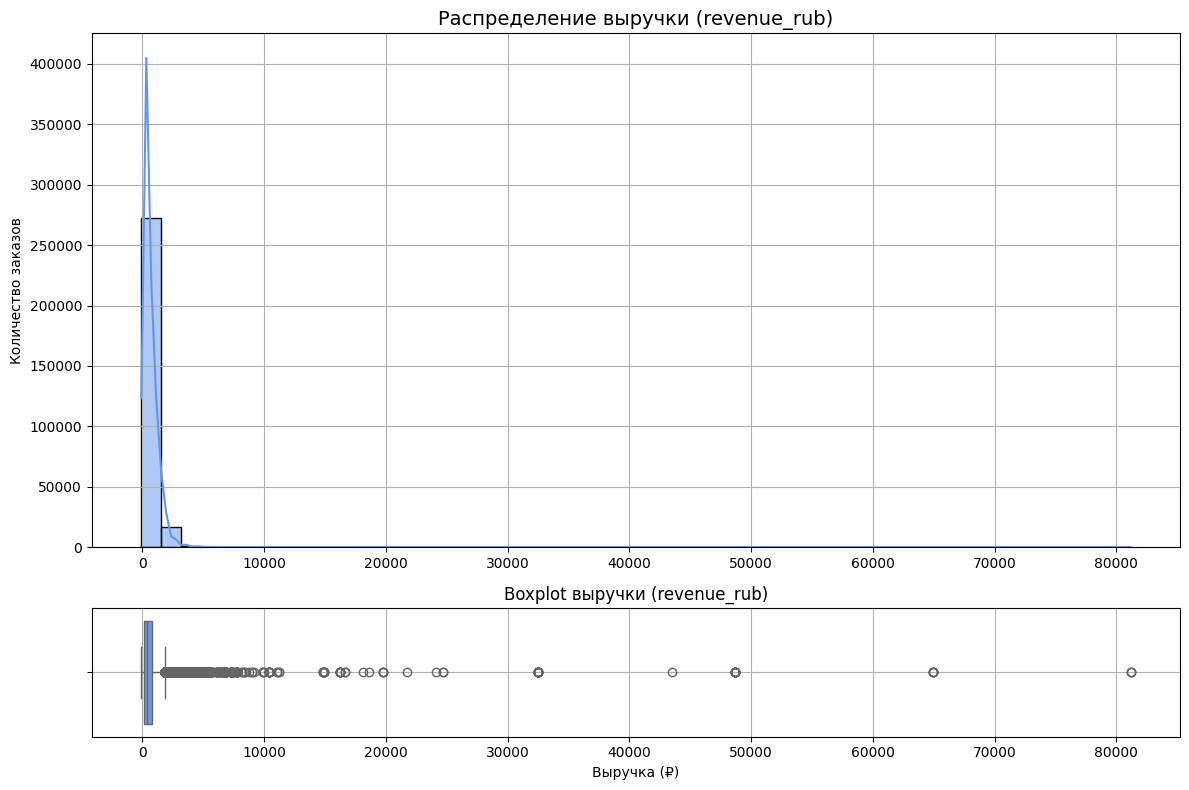

In [39]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [4, 1]})

sns.histplot(rub_df['revenue_rub'],
             bins=50,
             kde=True,
             color='cornflowerblue',
             edgecolor='black',
             ax=axes[0])
axes[0].set_title('Распределение выручки (revenue_rub)', fontsize=14)
axes[0].set_xlabel('') 
axes[0].set_ylabel('Количество заказов')
axes[0].grid(True)

sns.boxplot(x=rub_df['revenue_rub'],
            color='cornflowerblue',
            ax=axes[1])
axes[1].set_title('Boxplot выручки (revenue_rub)')
axes[1].set_xlabel('Выручка (₽)')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [40]:
revenue_rub_99 = rub_df['revenue_rub'].quantile(0.99)

rub_df_filt = rub_df[(rub_df['revenue_rub'] <= revenue_rub_99) &(rub_df['revenue_rub'] >= 0)]

print(f'Количество заказов после фильтрации: {rub_df_filt.shape[0]} из {rub_df.shape[0]}')

Количество заказов после фильтрации: 287347 из 290553


In [41]:
rub_df_filt['revenue_rub'].describe()

count    287347.000000
mean        518.758974
std         511.961691
min           0.000000
25%         112.650000
50%         344.861340
75%         788.900000
max        2628.421657
Name: revenue_rub, dtype: float64

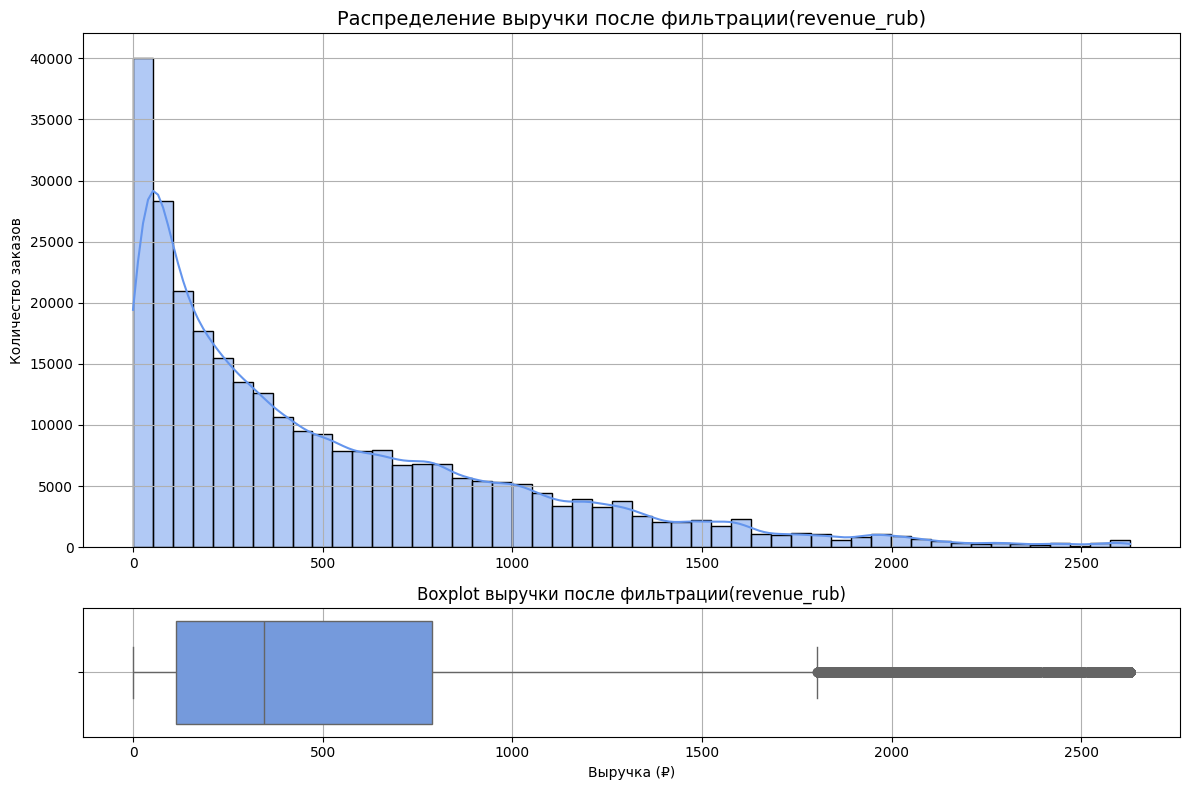

In [42]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [4, 1]})

sns.histplot(rub_df_filt['revenue_rub'],
             bins=50,
             kde=True,
             color='cornflowerblue',
             edgecolor='black',
             ax=axes[0])
axes[0].set_title('Распределение выручки после фильтрации(revenue_rub)', fontsize=14)
axes[0].set_xlabel('') 
axes[0].set_ylabel('Количество заказов')
axes[0].grid(True)

sns.boxplot(x=rub_df_filt['revenue_rub'],
            color='cornflowerblue',
            ax=axes[1])
axes[1].set_title('Boxplot выручки после фильтрации(revenue_rub)')
axes[1].set_xlabel('Выручка (₽)')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [43]:
rub_df_filt['tickets_count'].describe()

count    287347.000000
mean          2.741372
std           1.163076
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max          57.000000
Name: tickets_count, dtype: float64

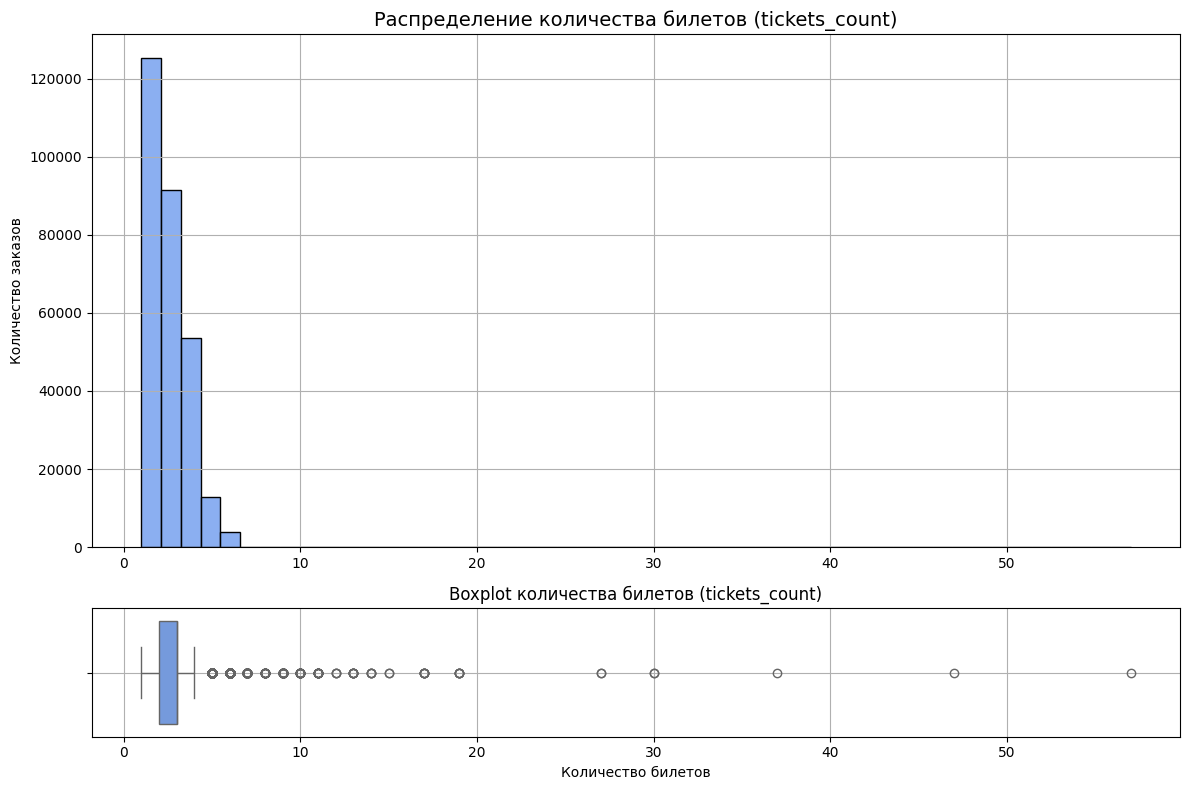

In [44]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [4, 1]})

sns.histplot(rub_df_filt['tickets_count'],
             bins=50,
             color='cornflowerblue',
             ax=axes[0])
axes[0].set_title('Распределение количества билетов (tickets_count)', fontsize=14)
axes[0].set_xlabel('') 
axes[0].set_ylabel('Количество заказов')
axes[0].grid(True)

sns.boxplot(x=rub_df_filt['tickets_count'],
            color='cornflowerblue',
            ax=axes[1])
axes[1].set_title('Boxplot количества билетов (tickets_count)')
axes[1].set_xlabel('Количество билетов')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Вывод по этапу предобработки данных

- **Основные действия:**

    - Проведена очистка данных: удалены строки с пропущенными значениями в ключевых столбцах, связанных с описанием событий (event_name, event_type_description, и др.).

    - Преобразованы типы данных:
        - Столбцы с датами (created_dt_msk, created_ts_msk) приведены к типу datetime.
        - Числовые столбцы оптимизированы для уменьшения потребления памяти (использованы типы int32, float32, int8).

    - Выполнена очистка от дубликатов: удалены повторяющиеся строки без учёта order_id.

    - Добавлены новые признаки:
    
        - revenue_rub — пересчитанная выручка заказа в рублях (с учётом конвертации валюты по курсу).

        - one_ticket_revenue_rub — стоимость одного билета в рублях.

        - month — месяц оформления заказа.

        - season — сезон оформления заказа (лето или осень).


- **Фильтрация данных:**

    - Выполнена фильтрация аномальных значений выручки:

    - До фильтрации было 290 553 заказов.

    - После фильтрации осталось 287 728 заказов (отсеяно около 1% заказов с чрезмерно высокой выручкой).


- **Промежуточный итог:**

    - Проведена полная очистка данных.
    - Существенно снижено потребление памяти за счёт оптимизации типов данных.
    - Подготовлены новые столбцы, которые позволят провести более детальный анализ продаж в дальнейшем.
    - Данные готовы к дальнейшему исследованию и построению моделей.



---
## Исследовательский анализ данных

### Анализ распределения заказов по сегментам и их сезонные изменения

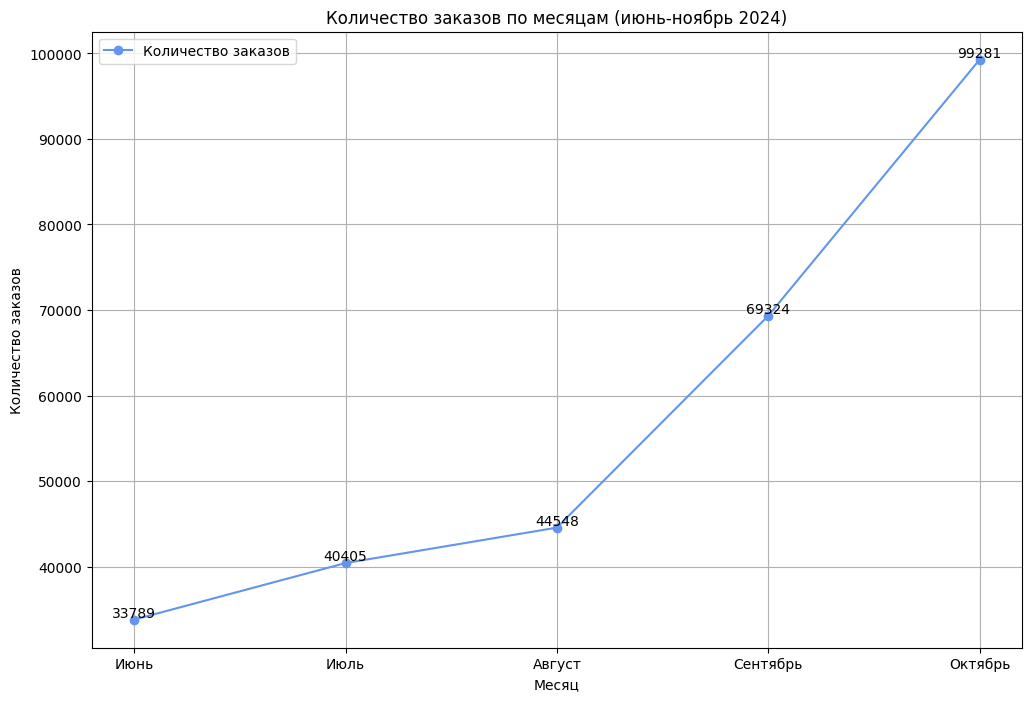

In [45]:
orders_count = rub_df_filt.groupby('month')['order_id'].count()

month_names = {6: 'Июнь', 7: 'Июль', 8: 'Август', 9: 'Сентябрь', 10: 'Октябрь'}
month_labels = [month_names.get(month, 'Другой месяц') for month in orders_count.index]

plt.figure(figsize=(12, 8))
plt.plot(month_labels,
         orders_count,
         marker='o',
         linestyle='-',
         color='cornflowerblue',
         label='Количество заказов')

for i, count in enumerate(orders_count):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Количество заказов по месяцам (июнь-ноябрь 2024)')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.legend()
plt.xticks(rotation=0) 
plt.grid(True)

plt.show()

In [46]:
summer_df = rub_df_filt[rub_df_filt['season'] == 'лето']
autumn_df = rub_df_filt[rub_df_filt['season'] == 'осень']

In [47]:
def prepare_data(summer_df, autumn_df, column, is_groupby=False):
    if is_groupby:
        summer = summer_df.groupby(column)['one_ticket_revenue_rub'].mean()
        autumn = autumn_df.groupby(column)['one_ticket_revenue_rub'].mean()
    else:
        summer = summer_df[column].value_counts(normalize=True)
        autumn = autumn_df[column].value_counts(normalize=True)
    all_categories = sorted(set(summer.index).union(autumn.index))
    return (summer.reindex(all_categories, fill_value=0)
                .sort_index(), 
            autumn.reindex(all_categories, fill_value=0)
                 .sort_index())

In [48]:
summer_event, autumn_event = prepare_data(summer_df, autumn_df, 'event_type_main')
summer_device, autumn_device = prepare_data(summer_df, autumn_df, 'device_type_canonical')
summer_age, autumn_age = prepare_data(summer_df, autumn_df, 'age_limit')
summer_revenue, autumn_revenue = prepare_data(summer_df, autumn_df, 'event_type_main', is_groupby=True)
relative_diff = (autumn_revenue / summer_revenue - 1).sort_values()

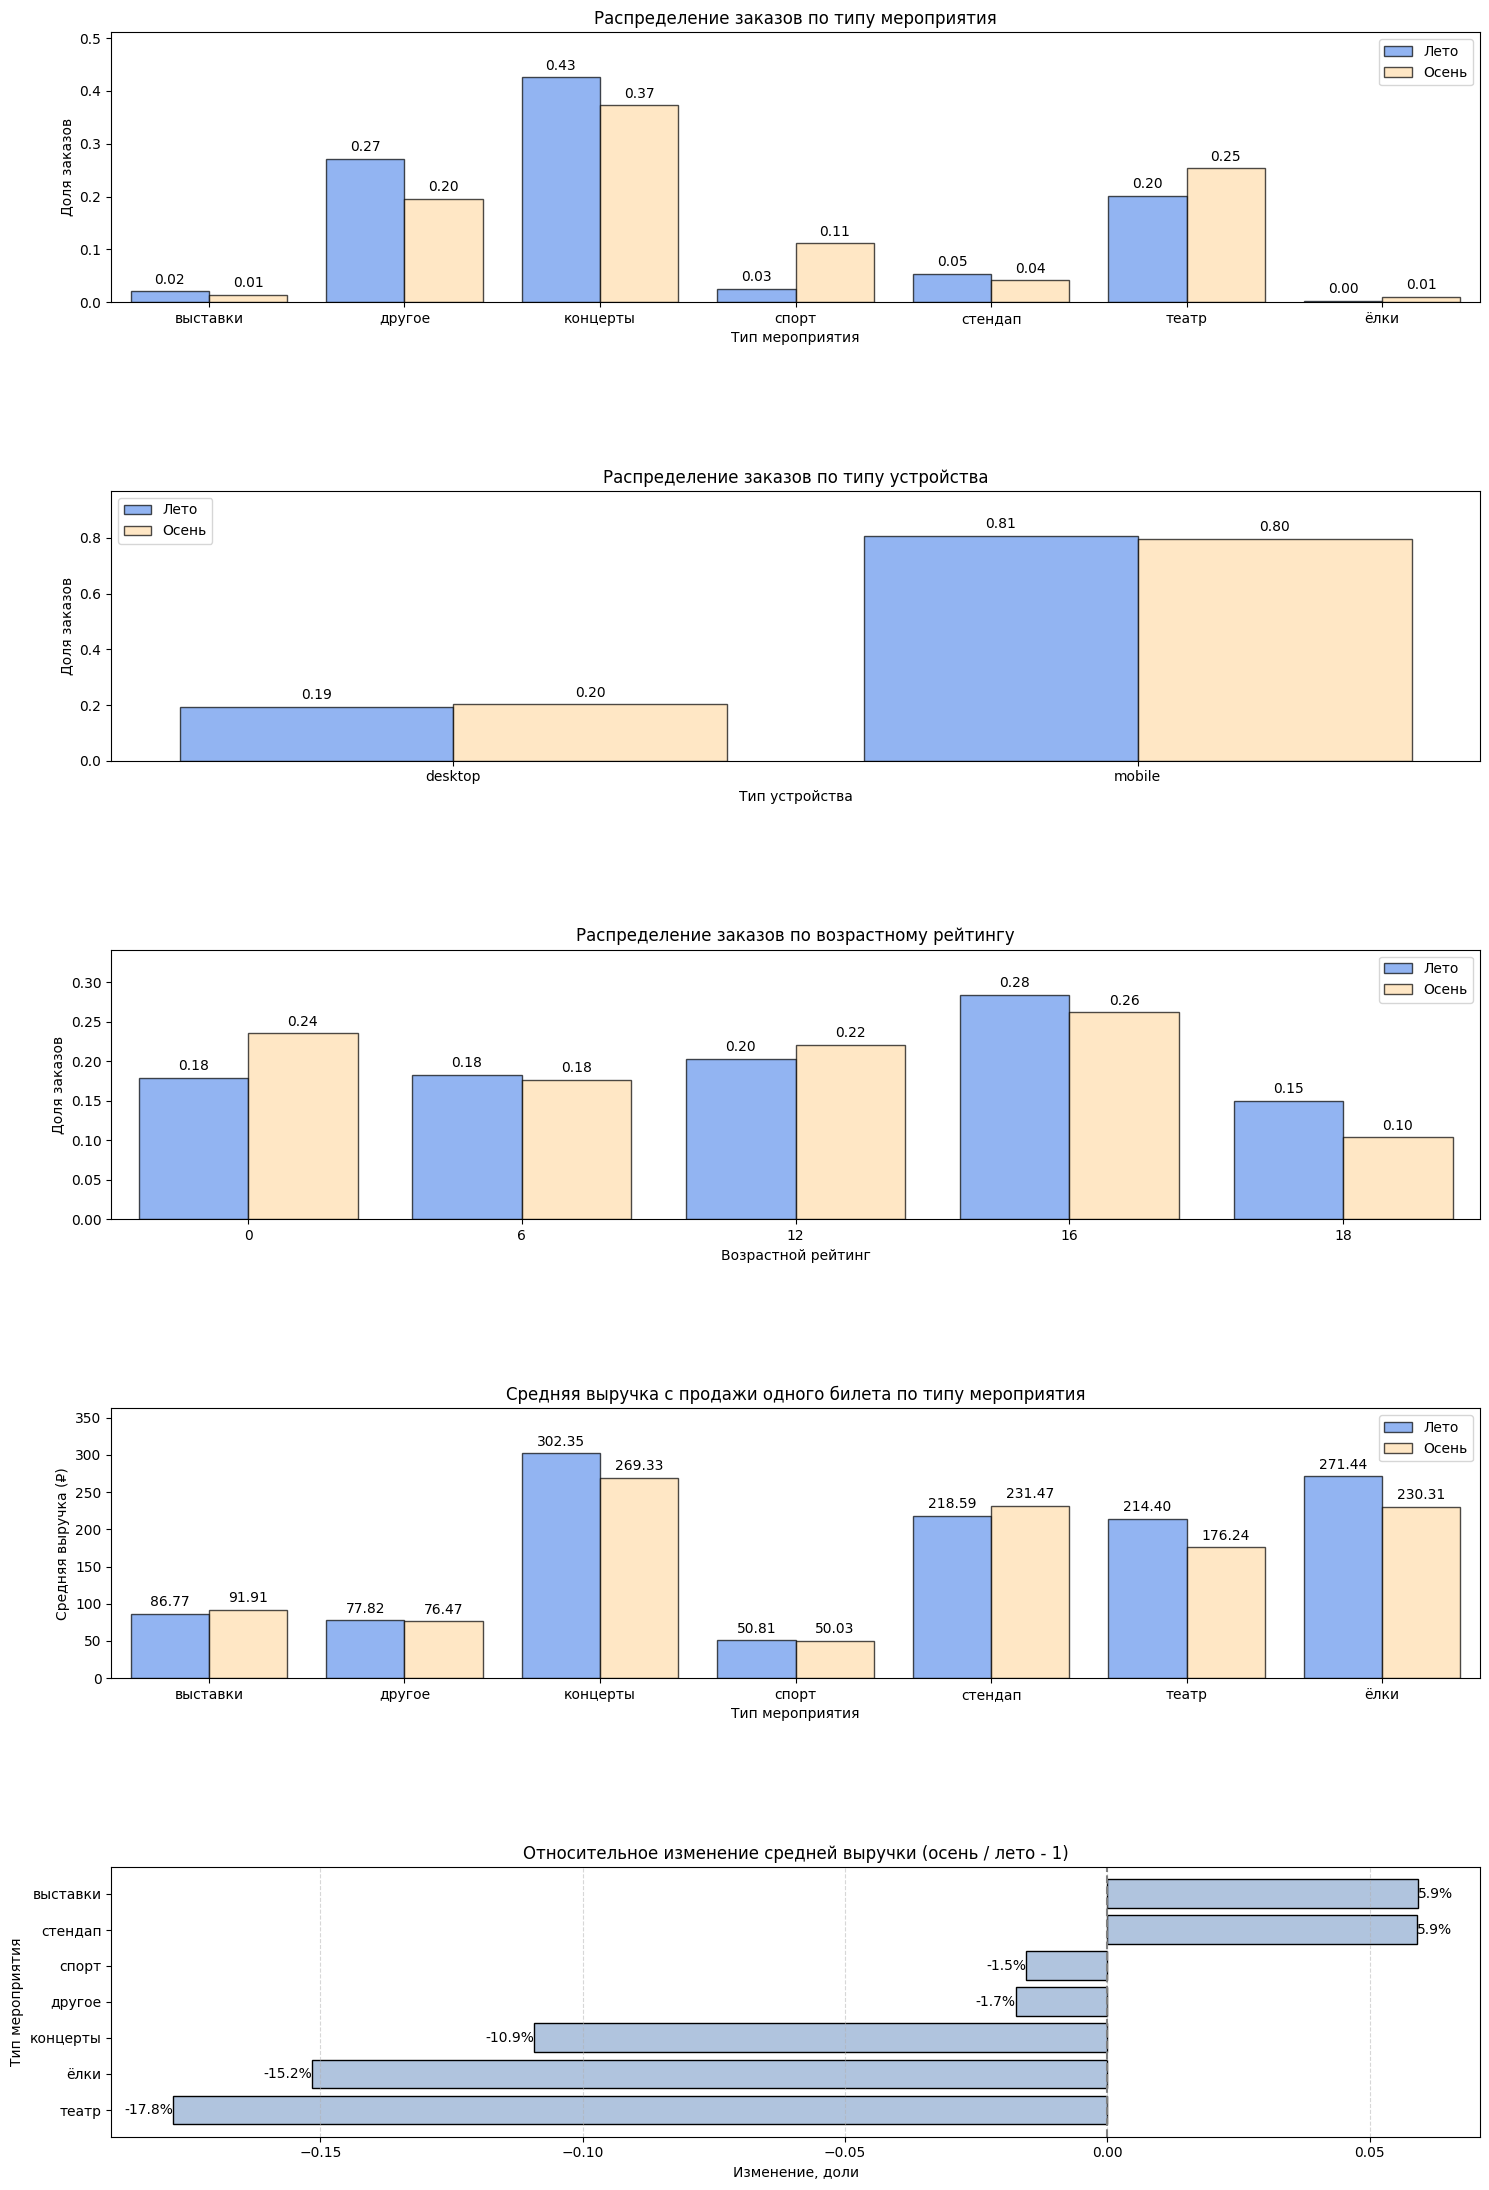

In [49]:
def plot_with_labels(ax, summer_series, autumn_series, title, xlabel, ylabel):
    summer_series.plot(kind='bar', ax=ax, color='cornflowerblue', edgecolor='black', alpha=0.7, position=1, width=0.4, label='Лето')
    autumn_series.plot(kind='bar', ax=ax, color='navajowhite', edgecolor='black', alpha=0.7, position=0, width=0.4, label='Осень')
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(range(len(summer_series)))
    ax.set_xticklabels(summer_series.index, rotation=0, ha='center')
    ax.legend()

    max_val = max(summer_series.max(), autumn_series.max())
    ax.set_ylim(0, max_val * 1.2)
    ax.set_xlim(-0.5, len(summer_series) - 0.5)

    for i, v in enumerate(summer_series):
        if v > 0:
            ax.text(i - 0.2, v + max_val * 0.02, f'{v:.2f}', ha='center', va='bottom', color='black')
            
    for i, v in enumerate(autumn_series):
        if v > 0:
            ax.text(i + 0.2, v + max_val * 0.02, f'{v:.2f}', ha='center', va='bottom', color='black')

fig, axes = plt.subplots(5, 1, figsize=(15, 22))

plot_with_labels(axes[0], summer_event, autumn_event, 
                 'Распределение заказов по типу мероприятия',
                 'Тип мероприятия', 'Доля заказов')

plot_with_labels(axes[1], summer_device, autumn_device,
                 'Распределение заказов по типу устройства',
                 'Тип устройства', 'Доля заказов')

plot_with_labels(axes[2], summer_age, autumn_age,
                 'Распределение заказов по возрастному рейтингу',
                 'Возрастной рейтинг', 'Доля заказов')

plot_with_labels(axes[3], summer_revenue, autumn_revenue,
                 'Средняя выручка с продажи одного билета по типу мероприятия',
                 'Тип мероприятия', 'Средняя выручка (₽)')

axes[4].barh(relative_diff.index, relative_diff.values, color='lightsteelblue', edgecolor='black')
axes[4].set_title('Относительное изменение средней выручки (осень / лето - 1)')
axes[4].set_xlabel('Изменение, доли')
axes[4].set_ylabel('Тип мероприятия')
axes[4].axvline(0, color='grey', linestyle='--')
axes[4].grid(axis='x', linestyle='--', alpha=0.5)

for i, v in enumerate(relative_diff.values):
    axes[4].text(v, i, f'{v:.1%}', va='center', ha='left' if v >= 0 else 'right', color='black')


plt.tight_layout()
plt.subplots_adjust(hspace=0.7)
plt.show()

In [50]:
print("=== Распределение заказов по типу мероприятия ===")
print("\nЛето:")
display(summer_event)
print("\nОсень:")
display(autumn_event)

print("\n---")

print("=== Распределение заказов по типу устройства ===")
print("\nЛето:")
display(summer_device)
print("\nОсень:")
display(autumn_device)

print("\n---")

print("=== Распределение заказов по возрастному рейтингу ===")
print("\nЛето:")
display(summer_age)
print("\nОсень:")
display(autumn_age)

print("\n---")

print("=== Средний чек за один билет по типу мероприятия ===")
print("\nЛето:")
display(summer_revenue)
print("\nОсень:")
display(autumn_revenue)

print("\n---")

print("=== Относительное изменение средней выручки (осень / лето - 1) по типу мероприятия ===")
display(relative_diff.map(lambda x: f"{x:.1%}"))

=== Распределение заказов по типу мероприятия ===

Лето:


event_type_main
выставки    0.020262
другое      0.271193
концерты    0.425772
спорт       0.025290
стендап     0.053460
театр       0.201723
ёлки        0.002299
Name: proportion, dtype: float64


Осень:


event_type_main
выставки    0.014246
другое      0.196115
концерты    0.373067
спорт       0.111841
стендап     0.041066
театр       0.253611
ёлки        0.010053
Name: proportion, dtype: float64


---
=== Распределение заказов по типу устройства ===

Лето:


device_type_canonical
desktop    0.193242
mobile     0.806758
Name: proportion, dtype: float64


Осень:


device_type_canonical
desktop    0.203671
mobile     0.796329
Name: proportion, dtype: float64


---
=== Распределение заказов по возрастному рейтингу ===

Лето:


age_limit
0     0.179128
6     0.183238
12    0.203180
16    0.284373
18    0.150082
Name: proportion, dtype: float64


Осень:


age_limit
0     0.235503
6     0.176916
12    0.221085
16    0.262264
18    0.104232
Name: proportion, dtype: float64


---
=== Средний чек за один билет по типу мероприятия ===

Лето:


event_type_main
выставки     86.772329
другое       77.824586
концерты    302.347040
спорт        50.813367
стендап     218.585827
театр       214.397787
ёлки        271.436176
Name: one_ticket_revenue_rub, dtype: float64


Осень:


event_type_main
выставки     91.905093
другое       76.465583
концерты    269.329264
спорт        50.028285
стендап     231.466954
театр       176.237282
ёлки        230.310069
Name: one_ticket_revenue_rub, dtype: float64


---
=== Относительное изменение средней выручки (осень / лето - 1) по типу мероприятия ===


event_type_main
театр       -17.8%
ёлки        -15.2%
концерты    -10.9%
другое       -1.7%
спорт        -1.5%
стендап       5.9%
выставки      5.9%
Name: one_ticket_revenue_rub, dtype: object

#### Выводы по распределению заказов по сегментам и их сезонные изменения
1. Количество заказов по месяцам
    - С наступлением осени количество заказов заметно увеличилось.
    - Если летом (июнь-август) ежемесячно оформляли 34–44 тысячи заказов,
        то в сентябре уже было ~69 тысяч заказов, а в октябре — почти 100 тысяч заказов.
    - Это связано с окончанием отпускного сезона и ростом интереса к мероприятиям в городе.


2. Распределение заказов по типу мероприятия
    - Летом самыми популярными были концерты (42,5%), затем категории другое (27,2%) и театр (20,1%).
    - Осенью доля концертов снизилась до 37,3%, зато выросла доля театра до 25,3% и спортивных мероприятий до 11,2% (летом спорт был только 2,5%).
    - Категория "другое" снизилась осенью до 19,7%.
    - Стендапы и выставки остались на примерно одинаковом уровне.
    - Также осенью немного увеличилась доля мероприятий типа "ёлки" (новогодние мероприятия) — с 0,2% до 1,0%.


3. Распределение заказов по типу устройства
    - Большинство заказов и летом, и осенью оформлялось с мобильных устройств (~80%).
    - Незначительное увеличение доли десктопов осенью: с 19,3% до 20,3%. Возможно, это связано с тем, что осенью пользователи чаще покупают билеты в рабочее время с компьютеров.


4. Распределение заказов по возрастному рейтингу мероприятий
    - 16+ остаётся самой популярной категорией, но её доля уменьшилась: с 28,4% летом до 26,2% осенью.
    - Значительно вырос интерес к мероприятиям без возрастных ограничений (0+): с 18,0% до 23,6%.
    - Доля заказов на мероприятия для 18+ аудитории снизилась: с 15% летом до 10% осенью.
    - Это может указывать на рост интереса к семейным мероприятиям в осенний период.


5. Средний чек за один билет по типу мероприятия
    - В большинстве категорий осенью средний чек снизился.
    - Например:
        - Концерты: с 302 ₽ летом до 269 ₽ осенью.
        - Театр: с 214 ₽ до 176 ₽.
        - Исключение — стендап и выставки, где средний чек наоборот вырос.
    - Средний чек на спортивные события, выставки и мероприятия из категории "другое" остался практически на прежнем уровне.


6. Относительное изменение средней выручки (осень / лето − 1)
    - Театр: −17.8%
    - Ёлки: −15.2%
    - Концерты: −10.9%
    - Другое: −1.7%
    - Спорт: −1.5%
    - Стендап и выставки: +5.9%
    - Это подтверждает: осенью большинство мероприятий стали дешевле, кроме стендапа и выставок, где выручка на билет выросла.

**Краткий итог**
- С приходом осени в поведении пользователей проявляются такие тенденции:
- Снижается интерес к концертам и возрастает популярность театра и спорта.
- Средние цены на концерты и театр падают, стендап — дорожает.
- Сохраняется сильный перекос в сторону мобильных заказов.
- Увеличивается доля мероприятий для широкой аудитории и семей.

### Осенняя активность пользователей
- Изучите активность пользователей осенью 2024 года. В вашем распоряжении данные за два осенних месяца. Используйте только эти данные и сделайте следующее:
- Проанализируйте динамику изменений по дням для:
    - общего числа заказов;
    - количества активных пользователей DAU;
    - среднего числа заказов на одного пользователя;
    - средней стоимости одного билета.
- Рекомендация: удобно создать одну сводную таблицу, и в ней по дням рассчитать число заказов и число уникальных пользователей, а затем найти величину — количество заказов на одного пользователя. Полученные результаты можно визуализировать с помощью линейного графика. Подобные графики вы строили на дашборде, только делали это с агрегацией по неделям.
Изучите недельную цикличность. Выделите день недели и сравните пользовательскую активность в будни и выходные.
Напишите промежуточный вывод о пользовательской активности и недельной цикличности.

In [51]:
autumn_metrics = autumn_df.groupby('created_dt_msk').agg(
                     orders_count = ('order_id', 'count'),
                     dau = ('user_id', 'nunique'),
                     mean_ticket_price = ('one_ticket_revenue_rub', 'mean'))

autumn_metrics['orders_per_user'] = autumn_metrics['orders_count'] / autumn_metrics['dau']

autumn_metrics.head()

,orders_count,dau,mean_ticket_price,orders_per_user
created_dt_msk,,,,
2024-09-01,1331,565,201.678176,2.355752
2024-09-02,1376,573,190.015637,2.401396
2024-09-03,5095,777,80.802794,6.557272
2024-09-04,1761,684,179.630227,2.574561
2024-09-05,1942,739,190.040733,2.627876


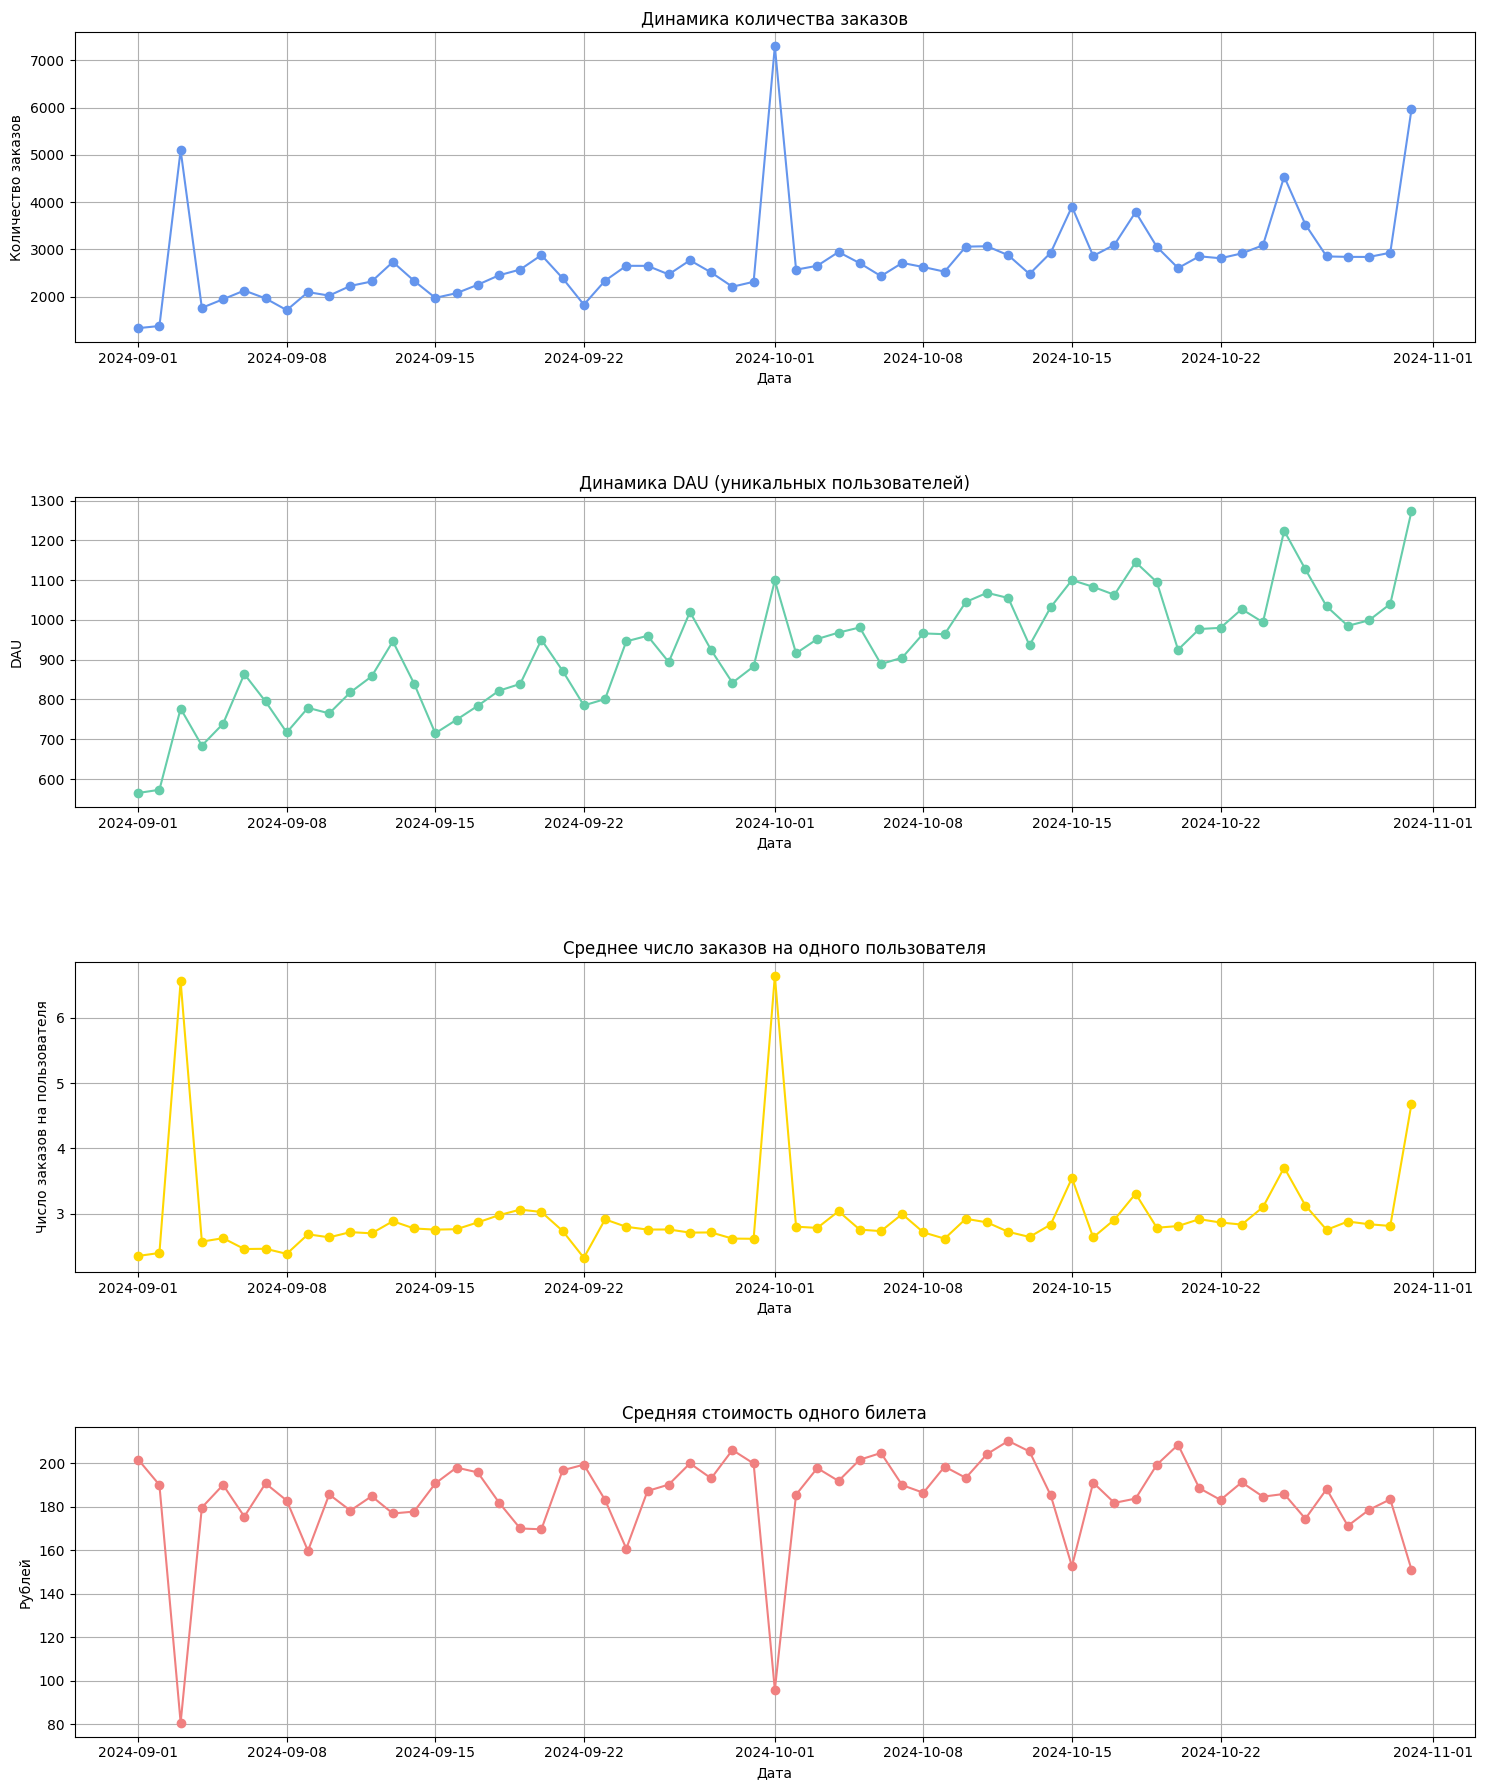

In [75]:
fig, axes = plt.subplots(4, 1, figsize=(15, 18))
axes = axes.flatten()

axes[0].plot(autumn_metrics.index,
             autumn_metrics['orders_count'],
             marker='o',
             linestyle='-',
             color='cornflowerblue')
axes[0].set_title('Динамика количества заказов')
axes[0].set_xlabel('Дата')
axes[0].set_ylabel('Количество заказов')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(True)

axes[1].plot(autumn_metrics.index,
             autumn_metrics['dau'],
             marker='o',
             linestyle='-',
             color='mediumaquamarine')
axes[1].set_title('Динамика DAU (уникальных пользователей)')
axes[1].set_xlabel('Дата')
axes[1].set_ylabel('DAU')
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(True)

axes[2].plot(autumn_metrics.index,
             autumn_metrics['orders_per_user'],
             marker='o',
             linestyle='-',
             color='gold')
axes[2].set_title('Среднее число заказов на одного пользователя')
axes[2].set_xlabel('Дата')
axes[2].set_ylabel('Число заказов на пользователя')
axes[2].tick_params(axis='x', rotation=0)
axes[2].grid(True)

axes[3].plot(autumn_metrics.index,
             autumn_metrics['mean_ticket_price'],
             marker='o',
             linestyle='-',
             color='lightcoral')
axes[3].set_title('Средняя стоимость одного билета')
axes[3].set_xlabel('Дата')
axes[3].set_ylabel('Рублей')
axes[3].tick_params(axis='x', rotation=0)
axes[3].grid(True)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

In [53]:
autumn_metrics['day_of_week'] = autumn_metrics.index.dayofweek + 1 

In [54]:
autumn_week = (autumn_metrics.groupby('day_of_week')
                .agg({
                    'orders_count': 'mean',
                    'dau': 'mean',
                    'orders_per_user': 'mean',
                    'mean_ticket_price': 'mean'
                })
)
autumn_week.index = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']

display(autumn_week)

,orders_count,dau,orders_per_user,mean_ticket_price
Пн,2390.555556,853.777778,2.779869,185.072748
Вт,3497.777778,935.111111,3.719403,157.739351
Ср,2541.777778,923.777778,2.749654,186.302503
Чт,3016.222222,961.888889,3.062248,182.624883
Пт,3104.250000,1023.125000,3.001731,185.949989
Сб,2668.125000,961.125000,2.761522,192.989483
Вс,2156.555556,823.111111,2.600041,198.588702


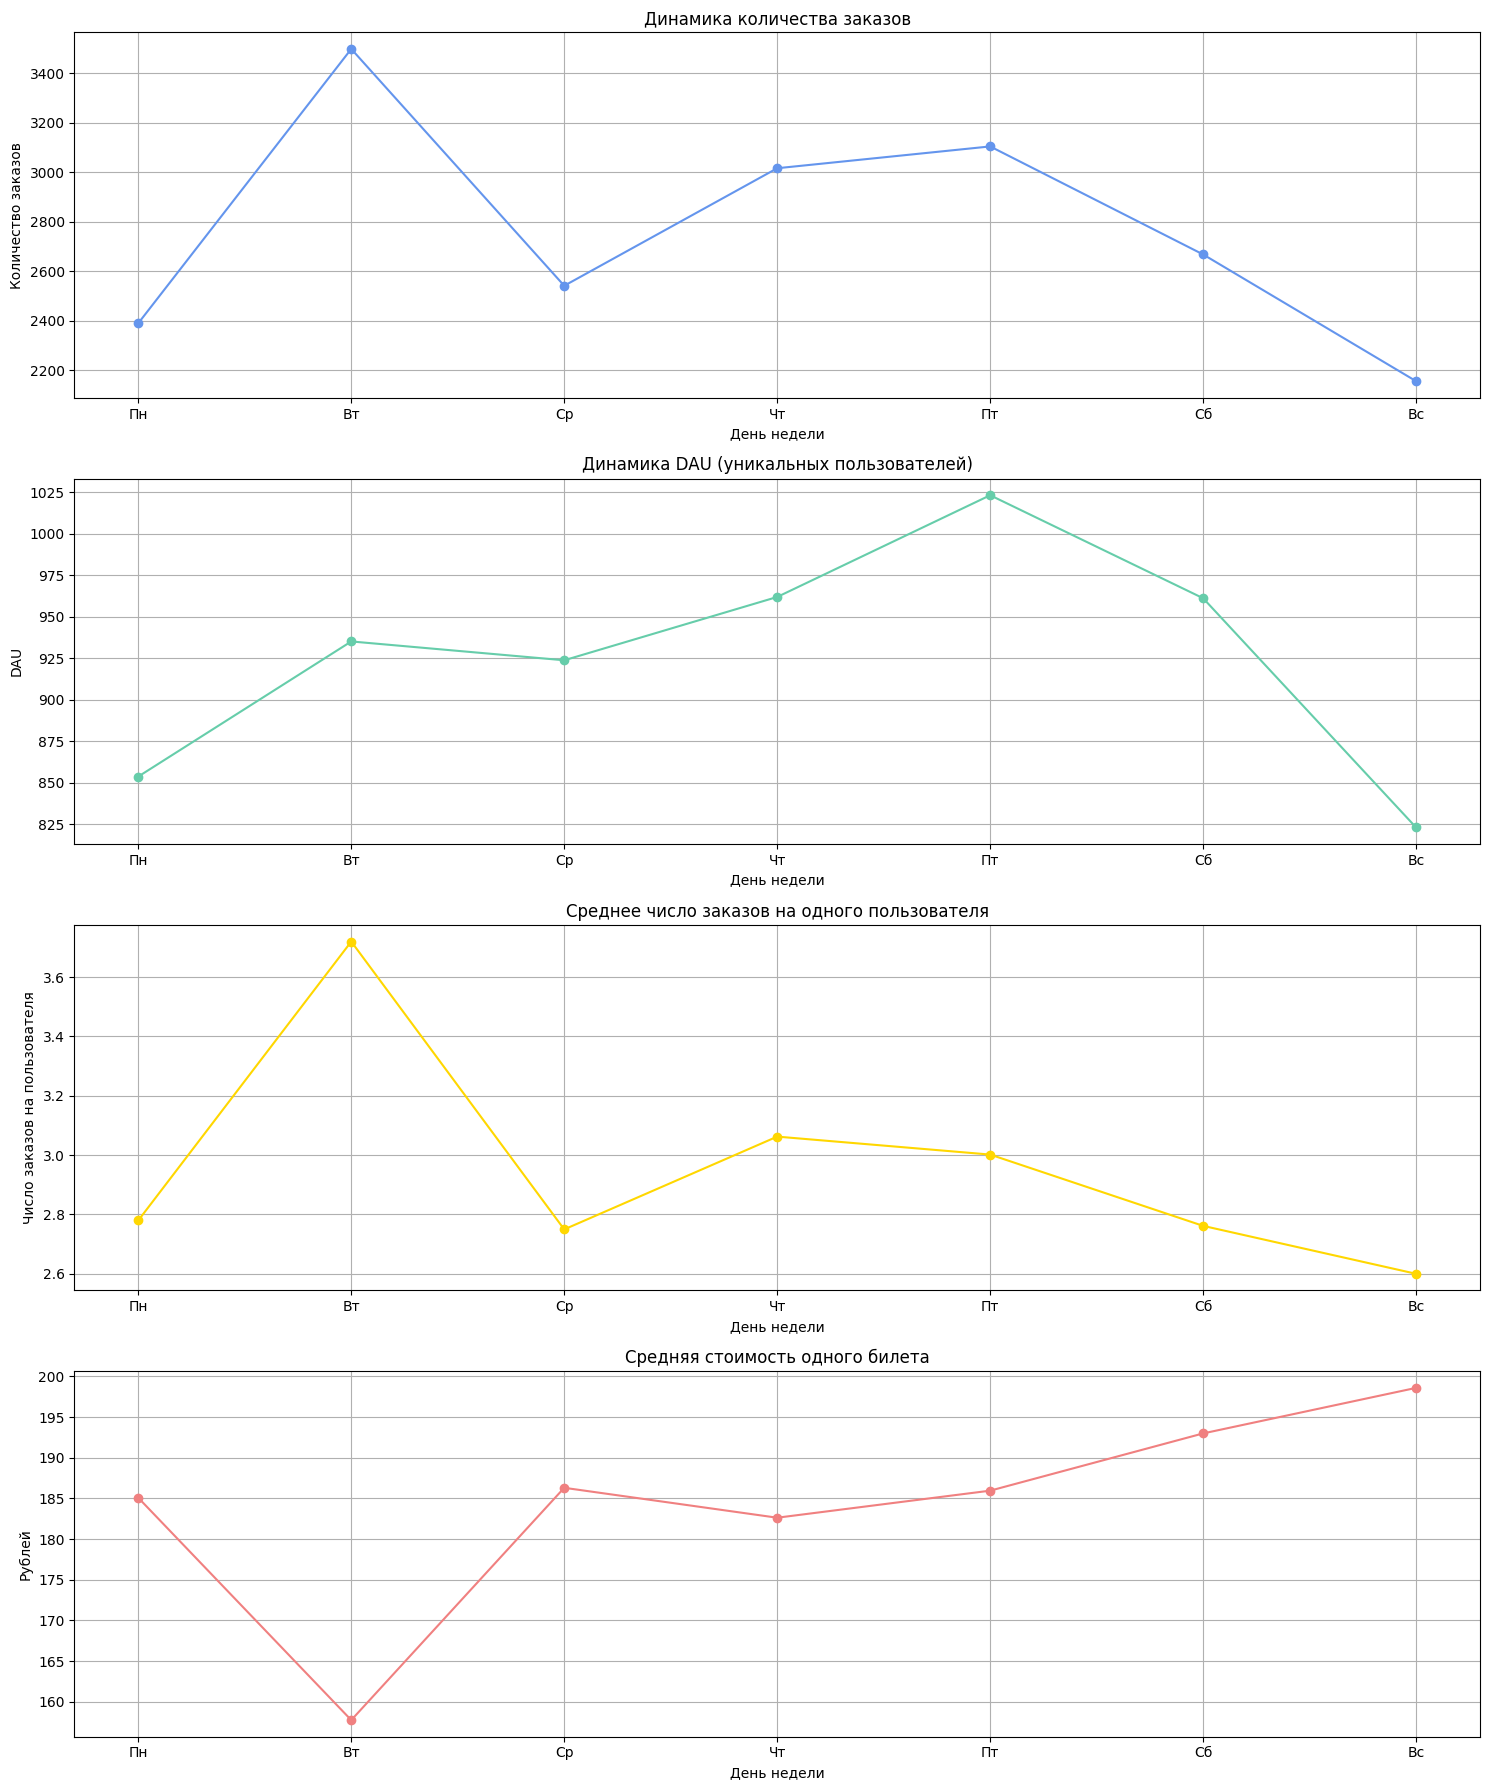

In [55]:
fig, axes = plt.subplots(4, 1, figsize=(15, 18))
axes = axes.flatten()


axes[0].plot(autumn_week.index,
             autumn_week['orders_count'],
             marker='o',
             linestyle='-',
             color='cornflowerblue')
axes[0].set_title('Динамика количества заказов')
axes[0].set_xlabel('День недели')
axes[0].set_ylabel('Количество заказов')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(True)

axes[1].plot(autumn_week.index,
             autumn_week['dau'],
             marker='o',
             linestyle='-',
             color='mediumaquamarine')
axes[1].set_title('Динамика DAU (уникальных пользователей)')
axes[1].set_xlabel('День недели')
axes[1].set_ylabel('DAU')
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(True)

axes[2].plot(autumn_week.index,
             autumn_week['orders_per_user'],
             marker='o',
             linestyle='-',
             color='gold')
axes[2].set_title('Среднее число заказов на одного пользователя')
axes[2].set_xlabel('День недели')
axes[2].set_ylabel('Число заказов на пользователя')
axes[2].tick_params(axis='x', rotation=0)
axes[2].grid(True)

axes[3].plot(autumn_week.index,
             autumn_week['mean_ticket_price'],
             marker='o',
             linestyle='-',
             color='lightcoral')
axes[3].set_title('Средняя стоимость одного билета')
axes[3].set_xlabel('День недели')
axes[3].set_ylabel('Рублей')
axes[3].tick_params(axis='x', rotation=0)
axes[3].grid(True)

plt.tight_layout()
plt.show()

#### Выводы по активности пользователей осенью 2024 года

- **Динамика количества заказов и пользователей**

    - С началом осени активность заметно выросла: если в начале сентября оформляли 1,3–2 тысячи заказов в день, то к октябрю — уже 2,5–3 тысячи заказов в день.
    - Самые крупные всплески активности пришлись на 3 сентября, 1 октября и 31 октября — в эти дни заказы кратно превышали обычный уровень.
    - Активных пользователей (DAU) также становилось больше: с 700–800 человек в начале сентября до 1000+ человек в октябре.


- **Среднее количество заказов на пользователя**

    - В обычные дни пользователи оформляли в среднем 2,7–3,0 заказа.
    - В дни пиковых распродаж (3 сентября, 1 и 31 октября) этот показатель резко увеличивался до 6 заказов на пользователя и выше.
    - Это указывает на массовые покупки и, возможно, акции с большими скидками.


- **Средняя стоимость билета**

    - В течение осени средняя стоимость одного билета оставалась стабильной: 180–200 рублей.
    - В дни с максимальным числом заказов (3 сентября, 1 октября, 31 октября) средний чек падал до 80–95 рублей — пользователи активно покупали недорогие билеты.


- **Недельная цикличность**

    - Активность пользователей выше в будние дни, особенно по вторникам и четвергам — больше заказов и выше среднее число заказов на пользователя.
    - В выходные наблюдается снижение числа заказов и пользователей, но при этом средний чек немного растёт: пользователи чаще посещают более дорогие мероприятия.

**Краткий итог**
- Осенью растёт общая активность пользователей и увеличивается число заказов.
- Пиковые дни связаны с массовыми покупками недорогих билетов.
- Самые активные дни недели — вторник и четверг.
- В выходные люди реже оформляют заказы, но покупают билеты на более дорогие события.



### Популярные события и партнёры
После того как изучите изменение популярности событий и пользовательской активности осенью 2024 года, посмотрите, как события распределены по регионам и партнёрам. Это позволит выделить ключевые регионы и партнёров, которые вносят наибольший вклад в выручку.
- Для каждого региона посчитайте уникальное количество мероприятий и общее число заказов. В каких регионах предлагается наибольшее разнообразие мероприятий?
- Для каждого билетного партнёра посчитайте общее число уникальных мероприятий, обработанных заказов и суммарную выручку с заказов билетов. Сделайте акцент на наиболее активных партнёрах.
- Рекомендация: исследуйте не только абсолютные значения, но и доли. Например, для каждого региона посчитайте долю проводимых мероприятий от их общего числа или долю заказов в регионе от общего числа заказов.
- В конце напишите промежуточный вывод, проанализируйте не только топ-категории, но и общее распределение данных между категориями. Существуют ли явные лидеры среди регионов и партнёров?


In [56]:
region_metrics = rub_df_filt.groupby('region_name').agg(
                   orders_count = ('order_id', 'count'),
                   events_count = ('event_id', 'nunique')
).sort_values(by = ['orders_count', 'events_count'], ascending =[False, False])

total_orders_all_regions = region_metrics['orders_count'].sum()
region_metrics['orders_ratio'] = region_metrics['orders_count'] / total_orders_all_regions

total_events_all_regions = region_metrics['events_count'].sum()
region_metrics['events_ratio'] = region_metrics['events_count'] / total_events_all_regions

top_10_region = region_metrics.head(10)
top_10_region

,orders_count,events_count,orders_ratio,events_ratio
region_name,,,,
Каменевский регион,89741,5940,0.312309,0.266392
Североярская область,43733,3798,0.152196,0.170329
Широковская область,16102,1225,0.056037,0.054938
Медовская область,13889,503,0.048335,0.022558
Озернинский край,10405,349,0.036211,0.015652
Светополянский округ,7486,1068,0.026052,0.047897
Малиновоярский округ,6510,165,0.022656,0.007400
Речиновская область,6267,701,0.021810,0.031438
Солнечноземская область,6242,521,0.021723,0.023365


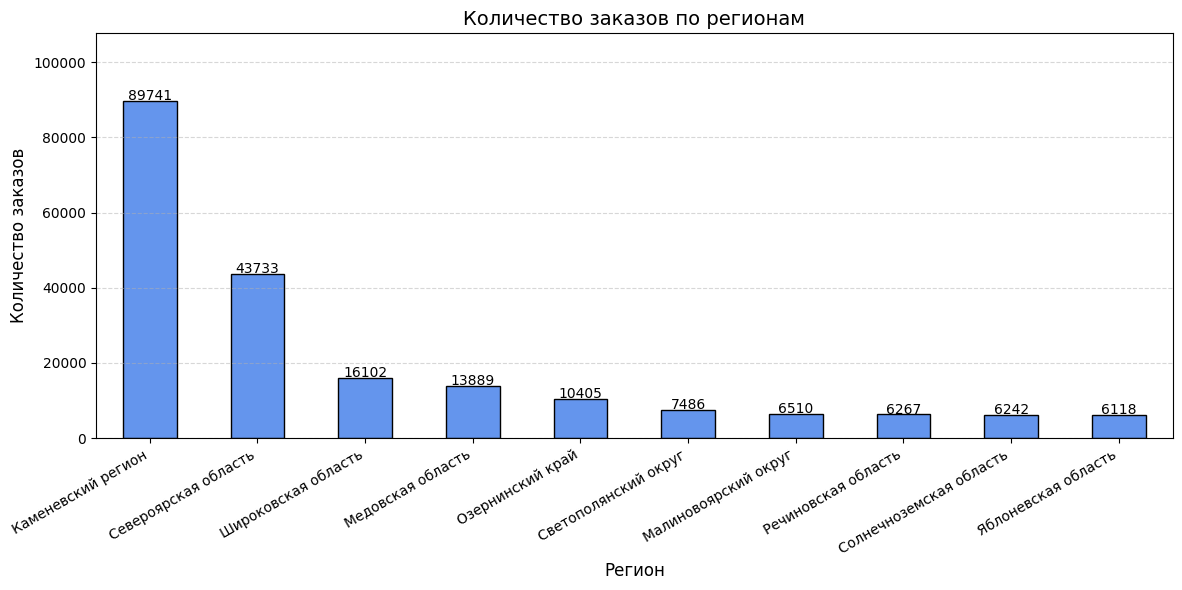

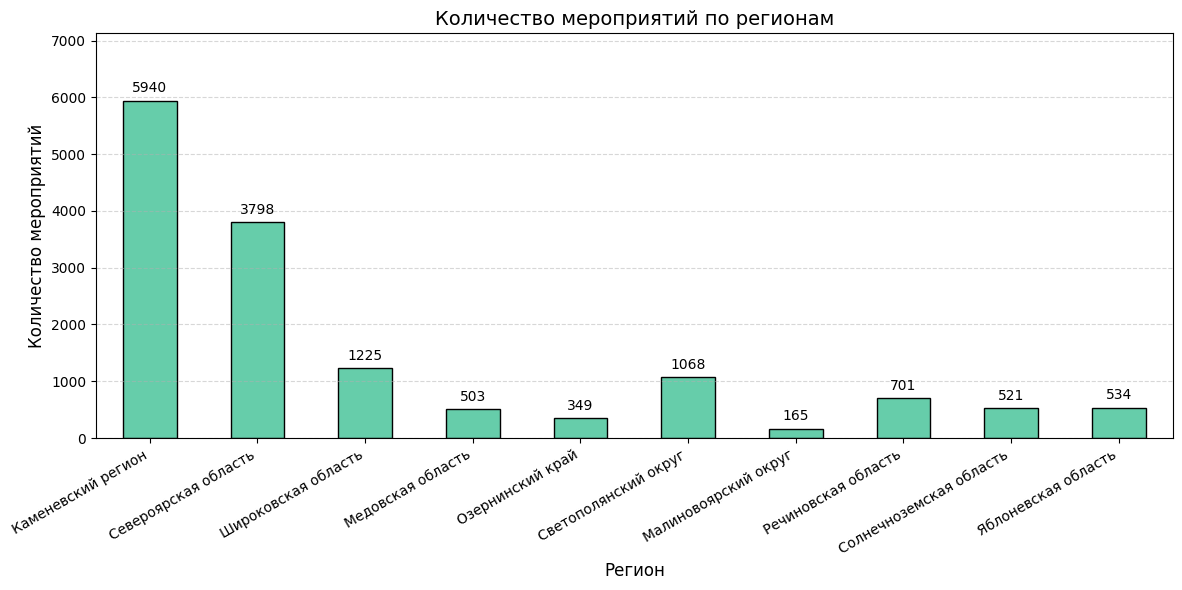

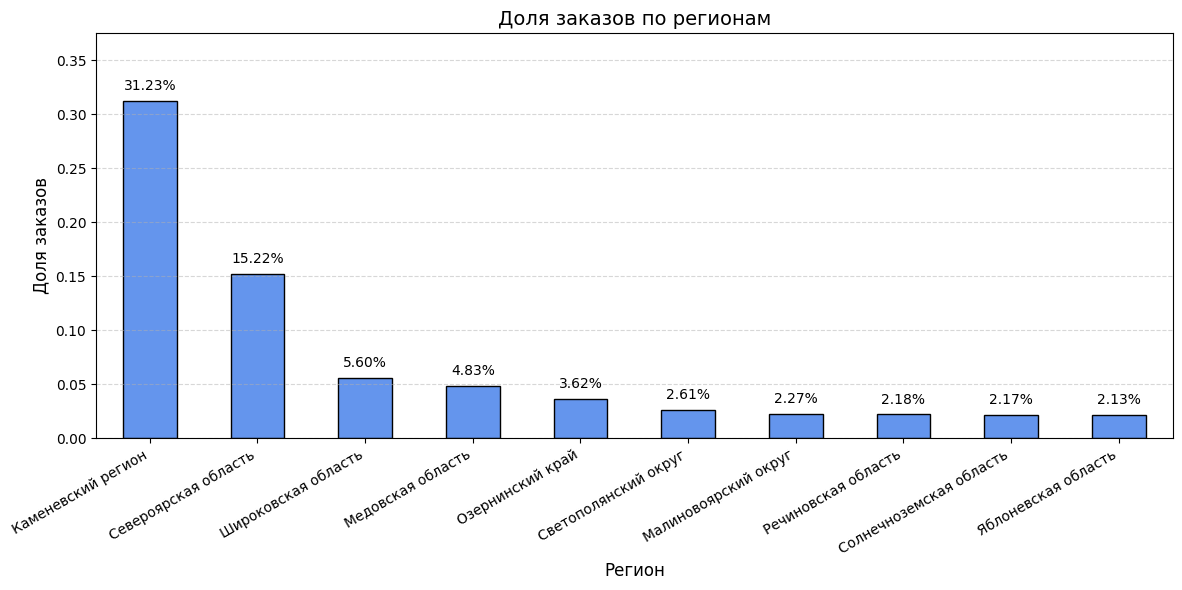

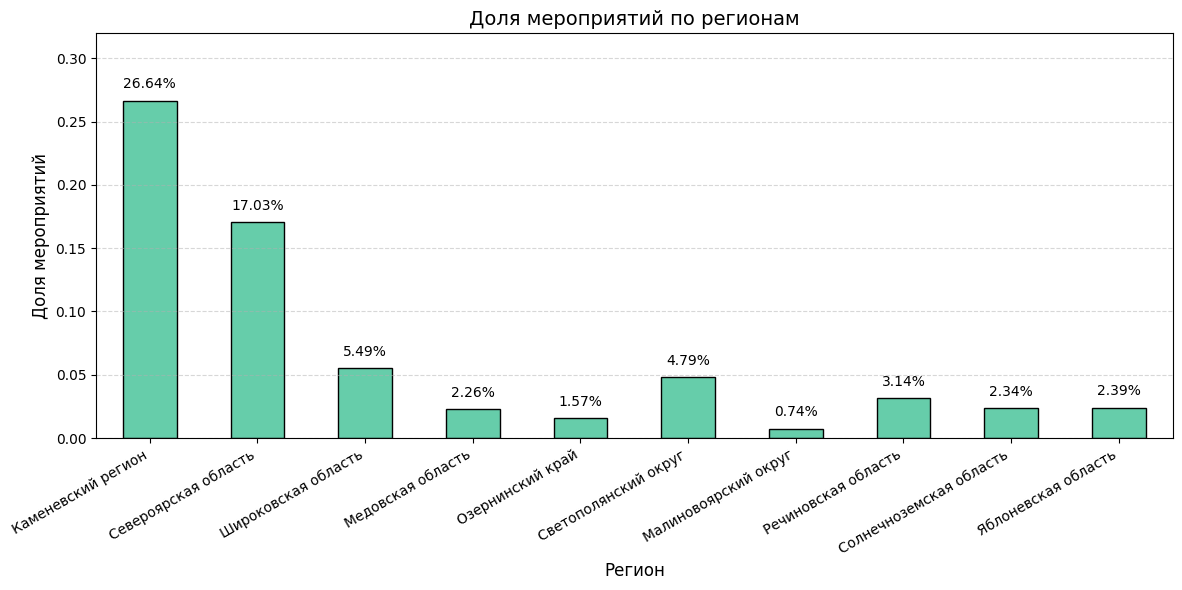

In [57]:
fig, ax = plt.subplots(figsize=(12, 6))
top_10_region['orders_count'].plot(kind='bar', ax=ax, color='cornflowerblue', edgecolor='black')
ax.set_title('Количество заказов по регионам', fontsize=14)
ax.set_xlabel('Регион', fontsize=12)
ax.set_ylabel('Количество заказов', fontsize=12)
ax.set_xticklabels(top_10_region.index, rotation=30, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.5)

ax.set_ylim(0, top_10_region['orders_count'].max() * 1.2)

for container in ax.patches:
    height = container.get_height()
    x = container.get_x() + container.get_width() / 2
    ax.text(x, height + 150, str(int(height)), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(12, 6))
top_10_region['events_count'].plot(kind='bar', ax=ax, color='mediumaquamarine', edgecolor='black')
ax.set_title('Количество мероприятий по регионам', fontsize=14)
ax.set_xlabel('Регион', fontsize=12)
ax.set_ylabel('Количество мероприятий', fontsize=12)
ax.set_xticklabels(top_10_region.index, rotation=30, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.5)

ax.set_ylim(0, top_10_region['events_count'].max() * 1.2)

for container in ax.patches:
    height = container.get_height()
    x = container.get_x() + container.get_width() / 2
    ax.text(x, height + 150, str(int(height)), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(12, 6))
top_10_region['orders_ratio'].plot(kind='bar', ax=ax, color='cornflowerblue', edgecolor='black')
ax.set_title('Доля заказов по регионам', fontsize=14)
ax.set_xlabel('Регион', fontsize=12)
ax.set_ylabel('Доля заказов', fontsize=12)
ax.set_xticklabels(top_10_region.index, rotation=30, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.5)

ax.set_ylim(0, top_10_region['orders_ratio'].max() * 1.2)

for container in ax.patches:
    height = container.get_height()
    x = container.get_x() + container.get_width() / 2
    ax.text(x, height + 0.01, f'{height:.2%}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(12, 6))
top_10_region['events_ratio'].plot(kind='bar', ax=ax, color='mediumaquamarine', edgecolor='black')
ax.set_title('Доля мероприятий по регионам', fontsize=14)
ax.set_xlabel('Регион', fontsize=12)
ax.set_ylabel('Доля мероприятий', fontsize=12)
ax.set_xticklabels(top_10_region.index, rotation=30, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.5)

ax.set_ylim(0, top_10_region['events_ratio'].max() * 1.2)

for container in ax.patches:
    height = container.get_height()
    x = container.get_x() + container.get_width() / 2
    ax.text(x, height + 0.01, f'{height:.2%}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [58]:
partners_metrics = rub_df_filt.groupby('service_name').agg(
                   orders_count = ('order_id', 'count'),
                   events_count = ('event_id', 'nunique'),
                   total_revenue = ('revenue_rub', 'sum')
).sort_values(by = ['total_revenue', 'orders_count', 'events_count'], ascending =[False, False, False])

total_orders_all_partners = partners_metrics['orders_count'].sum()
partners_metrics['orders_ratio'] = partners_metrics['orders_count'] / total_orders_all_partners

total_events_all_partners = partners_metrics['events_count'].sum()
partners_metrics['events_ratio'] = partners_metrics['events_count'] / total_events_all_partners

total_revenue_all_partners = partners_metrics['total_revenue'].sum()
partners_metrics['revenue_ratio'] = partners_metrics['total_revenue'] / total_revenue_all_partners

top_10_partners = partners_metrics.head(10)
top_10_partners 

,orders_count,events_count,total_revenue,orders_ratio,events_ratio,revenue_ratio
service_name,,,,,,
Билеты без проблем,62828,4211,2.485223e+07,0.218649,0.173121,0.166722
Мой билет,34136,1300,2.106031e+07,0.118797,0.053445,0.141284
Облачко,26410,2335,1.860930e+07,0.091910,0.095996,0.124841
Лови билет!,40783,4862,1.672960e+07,0.141929,0.199885,0.112231
Весь в билетах,16438,856,1.656688e+07,0.057206,0.035192,0.111140
Билеты в руки,40186,3517,1.320208e+07,0.139852,0.144590,0.088567
Край билетов,6118,252,6.429182e+06,0.021291,0.010360,0.043130
Прачечная,10222,1026,4.746811e+06,0.035574,0.042181,0.031844
Дом культуры,4428,272,4.400413e+06,0.015410,0.011182,0.029520


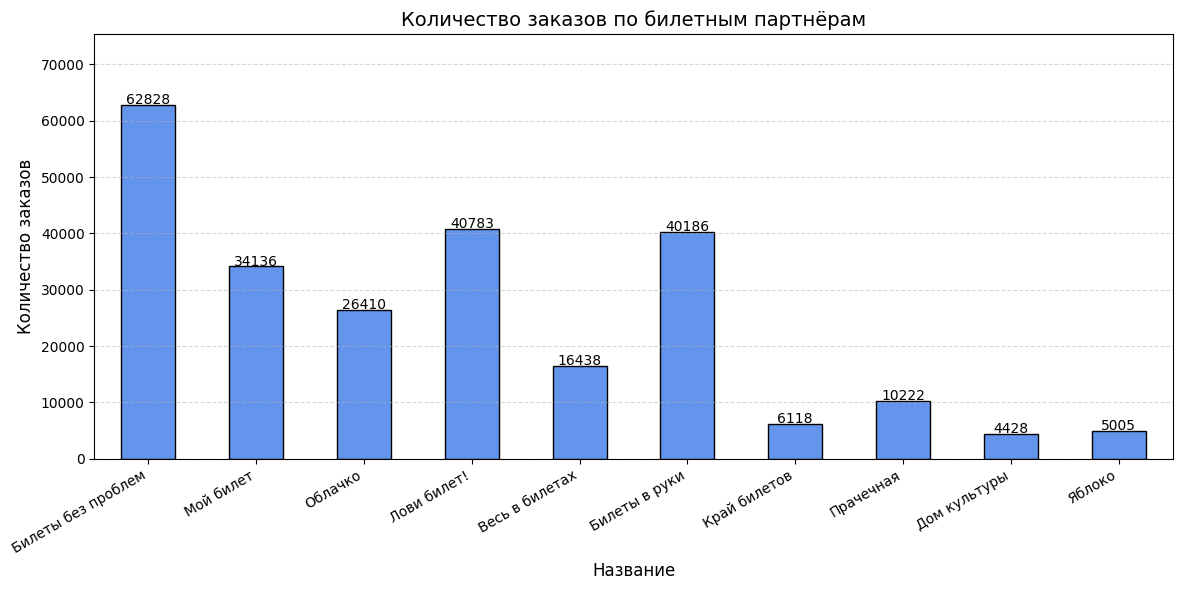

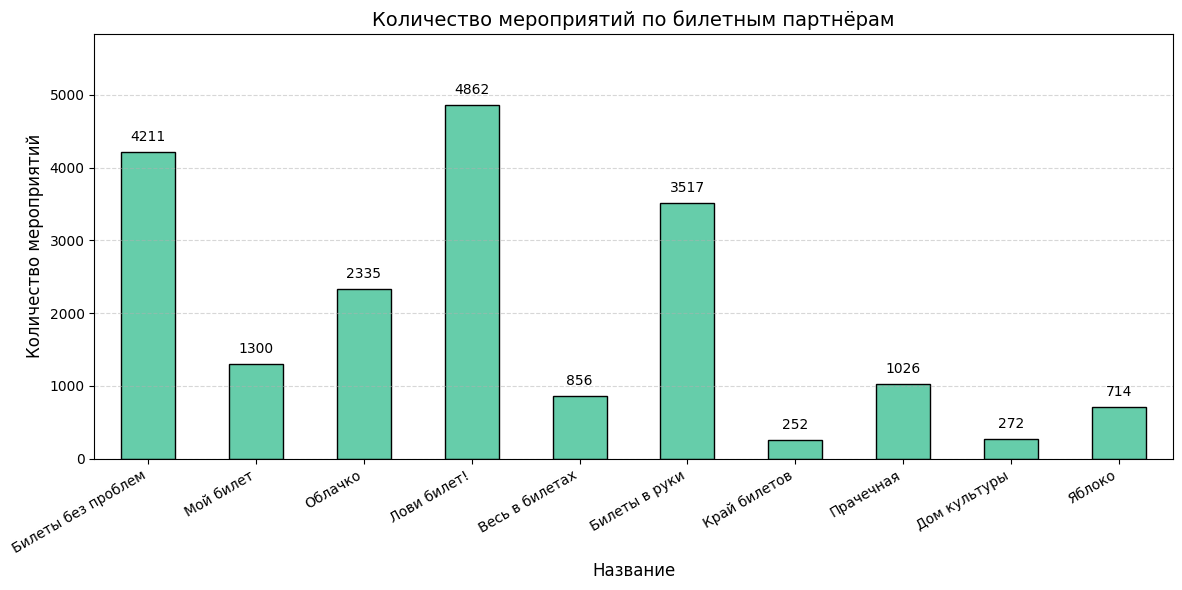

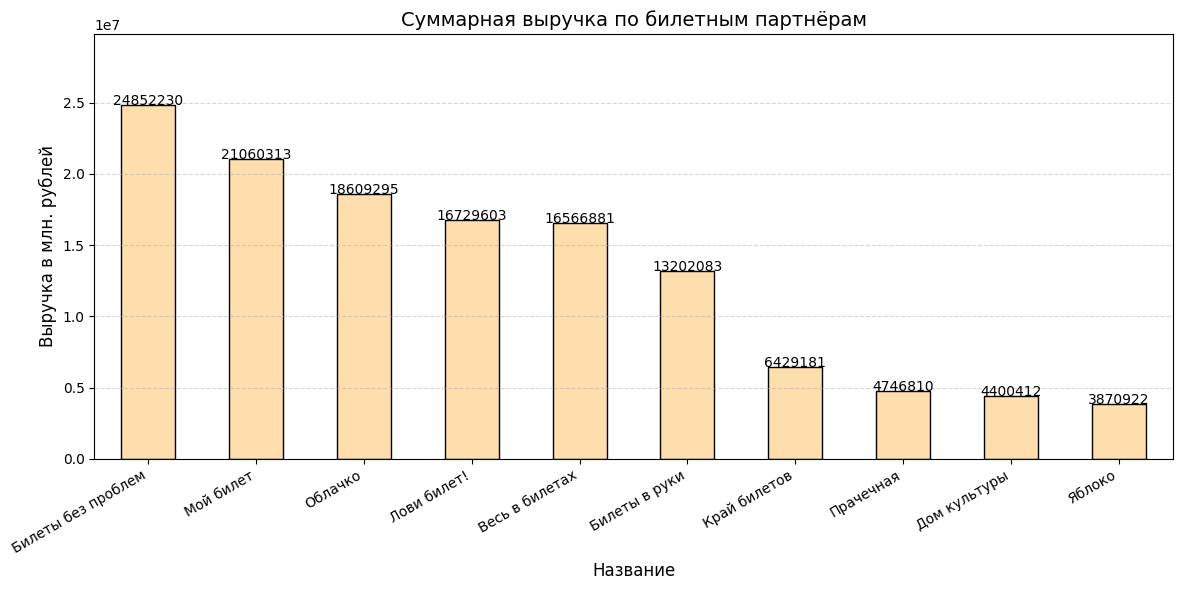

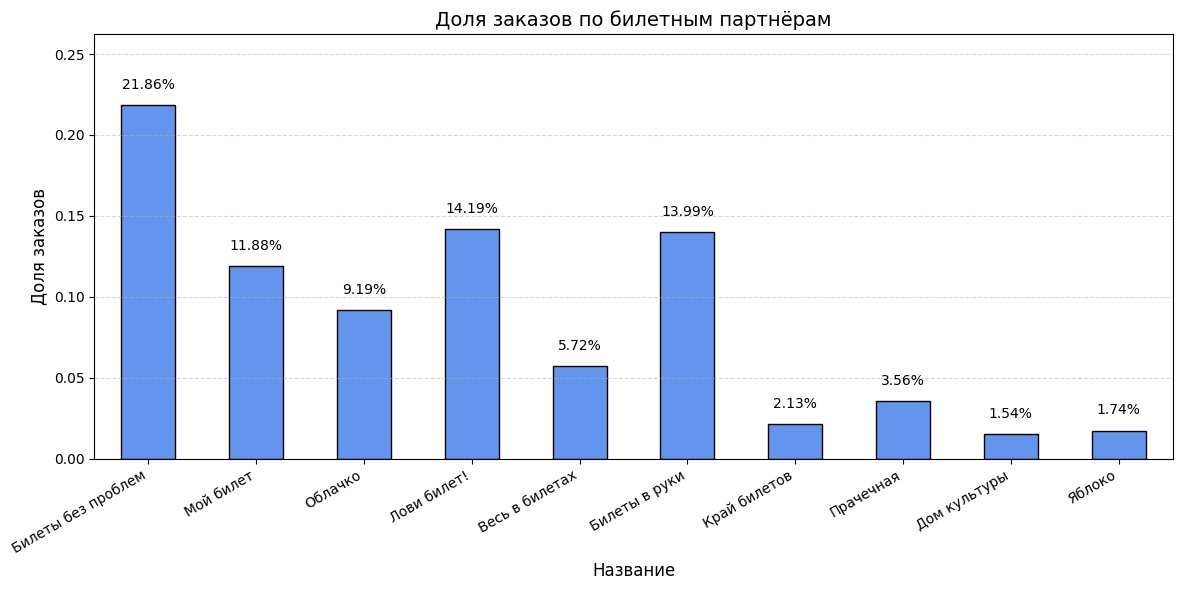

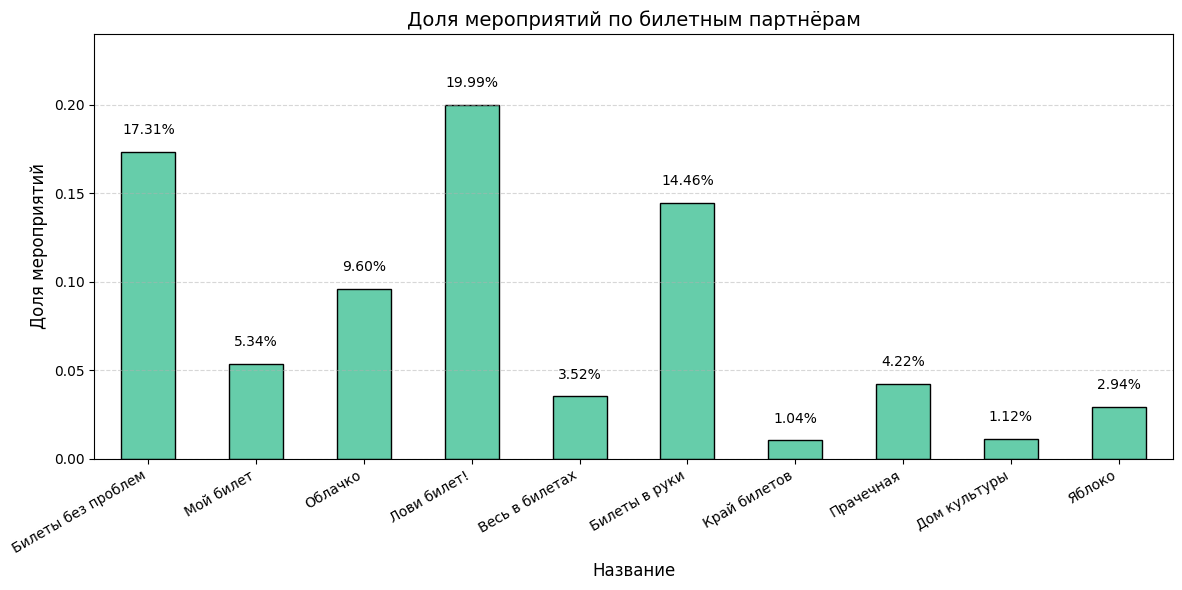

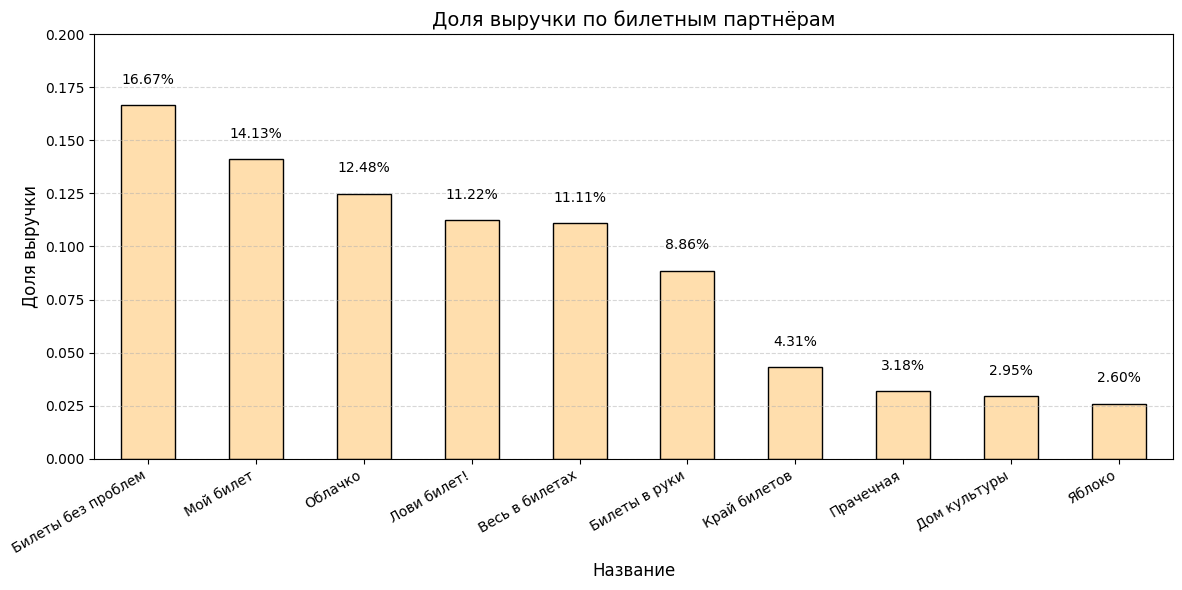

In [59]:
fig, ax = plt.subplots(figsize=(12, 6))
top_10_partners['orders_count'].plot(kind='bar', ax=ax, color='cornflowerblue', edgecolor='black')
ax.set_title('Количество заказов по билетным партнёрам', fontsize=14)
ax.set_xlabel('Название', fontsize=12)
ax.set_ylabel('Количество заказов', fontsize=12)
ax.set_xticklabels(top_10_partners.index, rotation=30, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.5)

ax.set_ylim(0, top_10_partners['orders_count'].max() * 1.2)

for container in ax.patches:
    height = container.get_height()
    x = container.get_x() + container.get_width() / 2
    ax.text(x, height + 150, str(int(height)), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(12, 6))
top_10_partners['events_count'].plot(kind='bar', ax=ax, color='mediumaquamarine', edgecolor='black')
ax.set_title('Количество мероприятий по билетным партнёрам', fontsize=14)
ax.set_xlabel('Название', fontsize=12)
ax.set_ylabel('Количество мероприятий', fontsize=12)
ax.set_xticklabels(top_10_partners.index, rotation=30, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.5)

ax.set_ylim(0, top_10_partners['events_count'].max() * 1.2)

for container in ax.patches:
    height = container.get_height()
    x = container.get_x() + container.get_width() / 2
    ax.text(x, height + 150, str(int(height)), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
top_10_partners['total_revenue'].plot(kind='bar', ax=ax, color='navajowhite', edgecolor='black')
ax.set_title('Суммарная выручка по билетным партнёрам', fontsize=14)
ax.set_xlabel('Название', fontsize=12)
ax.set_ylabel('Выручка в млн. рублей', fontsize=12)
ax.set_xticklabels(top_10_partners.index, rotation=30, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.5)

ax.set_ylim(0, top_10_partners['total_revenue'].max() * 1.2)

for container in ax.patches:
    height = container.get_height()
    x = container.get_x() + container.get_width() / 2
    ax.text(x, height + 150, str(int(height)), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
top_10_partners['orders_ratio'].plot(kind='bar', ax=ax, color='cornflowerblue', edgecolor='black')
ax.set_title('Доля заказов по билетным партнёрам', fontsize=14)
ax.set_xlabel('Название', fontsize=12)
ax.set_ylabel('Доля заказов', fontsize=12)
ax.set_xticklabels(top_10_partners.index, rotation=30, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.5)

ax.set_ylim(0, top_10_partners['orders_ratio'].max() * 1.2)

for container in ax.patches:
    height = container.get_height()
    x = container.get_x() + container.get_width() / 2
    ax.text(x, height + 0.01, f'{height:.2%}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=(12, 6))
top_10_partners['events_ratio'].plot(kind='bar', ax=ax, color='mediumaquamarine', edgecolor='black')
ax.set_title('Доля мероприятий по билетным партнёрам', fontsize=14)
ax.set_xlabel('Название', fontsize=12)
ax.set_ylabel('Доля мероприятий', fontsize=12)
ax.set_xticklabels(top_10_partners.index, rotation=30, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.5)

ax.set_ylim(0, top_10_partners['events_ratio'].max() * 1.2)

for container in ax.patches:
    height = container.get_height()
    x = container.get_x() + container.get_width() / 2
    ax.text(x, height + 0.01, f'{height:.2%}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
top_10_partners['revenue_ratio'].plot(kind='bar', ax=ax, color='navajowhite', edgecolor='black')
ax.set_title('Доля выручки по билетным партнёрам', fontsize=14)
ax.set_xlabel('Название', fontsize=12)
ax.set_ylabel('Доля выручки', fontsize=12)
ax.set_xticklabels(top_10_partners.index, rotation=30, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.5)

ax.set_ylim(0, top_10_partners['revenue_ratio'].max() * 1.2)

for container in ax.patches:
    height = container.get_height()
    x = container.get_x() + container.get_width() / 2
    ax.text(x, height + 0.01, f'{height:.2%}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

#### Выводы по популярным событиям и партнёрам
- **Анализ по регионам**
    - Топ 3 региона по количеству заказов:
        - `Каменевский регион`: 89,741 заказов (31,2% всех заказов).
        - `Североярская область`: 43,733 заказов (15,2%).
        - `Широковская область`: 16,102 заказов (5,6%).
    - Топ 3 региона по разнообразию мероприятий:
        - `Каменевский регион` (5940 мероприятий) лидирует по числу мероприятий.
        - `Североярская` и `Широковская` области также предлагают разнообразие.
    - Региональное распределение:
        - Каменевский регион занимает основную долю, остальные регионы имеют меньшую активность и разнообразие.
        
        
- **Анализ по партнёрам**
    - Топ 3 партнера:
        - `Билеты без проблем`: 62,828 заказов, 4,211 мероприятий, выручка 24,85 млн ₽.
        - `Мой билет`: 34,136 заказов, 1,300 мероприятий, выручка 21,06 млн ₽.
        - `Лови билет!`: 40,783 заказов, 4,862 мероприятия, выручка 16,73 млн ₽.
    - Партнеры с меньшей активностью:
        - `Яблоко` и `Дом культуры` имеют минимальное количество заказов и выручки.

**Краткий итог:**
- `Каменевский регион` и `Билеты без проблем` доминируют по количеству заказов и выручке. 

## Статистический анализ данных

### Подготовка данных для тестирования гипотез

In [60]:
device_per_user = autumn_df.groupby('user_id')['device_type_canonical'].nunique()
users_in_multiple_devices = device_per_user[device_per_user > 1]
print(f'Количество пользователей, которые встречаются одновременно в группах mobile и desktop: {users_in_multiple_devices.shape[0]}')

Количество пользователей, которые встречаются одновременно в группах mobile и desktop: 3250


In [61]:
users_to_exclude = users_in_multiple_devices.index
device_test_participants = autumn_df[~autumn_df['user_id'].isin(users_to_exclude)]
device_test_participants.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34463 entries, 2 to 290552
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_id                34463 non-null  int32         
 1   user_id                 34463 non-null  object        
 2   created_dt_msk          34463 non-null  datetime64[ns]
 3   created_ts_msk          34463 non-null  datetime64[ns]
 4   event_id                34463 non-null  int32         
 5   cinema_circuit          34463 non-null  object        
 6   age_limit               34463 non-null  int8          
 7   currency_code           34463 non-null  object        
 8   device_type_canonical   34463 non-null  object        
 9   revenue                 34463 non-null  float64       
 10  service_name            34463 non-null  object        
 11  tickets_count           34463 non-null  int8          
 12  total                   34463 non-null  float64   

In [62]:
dup_part = device_test_participants[device_test_participants['order_id'].duplicated(keep = False)].sort_values('order_id')
dup_part

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx,revenue_rub,one_ticket_revenue_rub,month,season


C:\Users\elise\AppData\Local\Temp\ipykernel_45604\1981295430.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\elise\AppData\Local\Temp\ipykernel_45604\1981295430.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


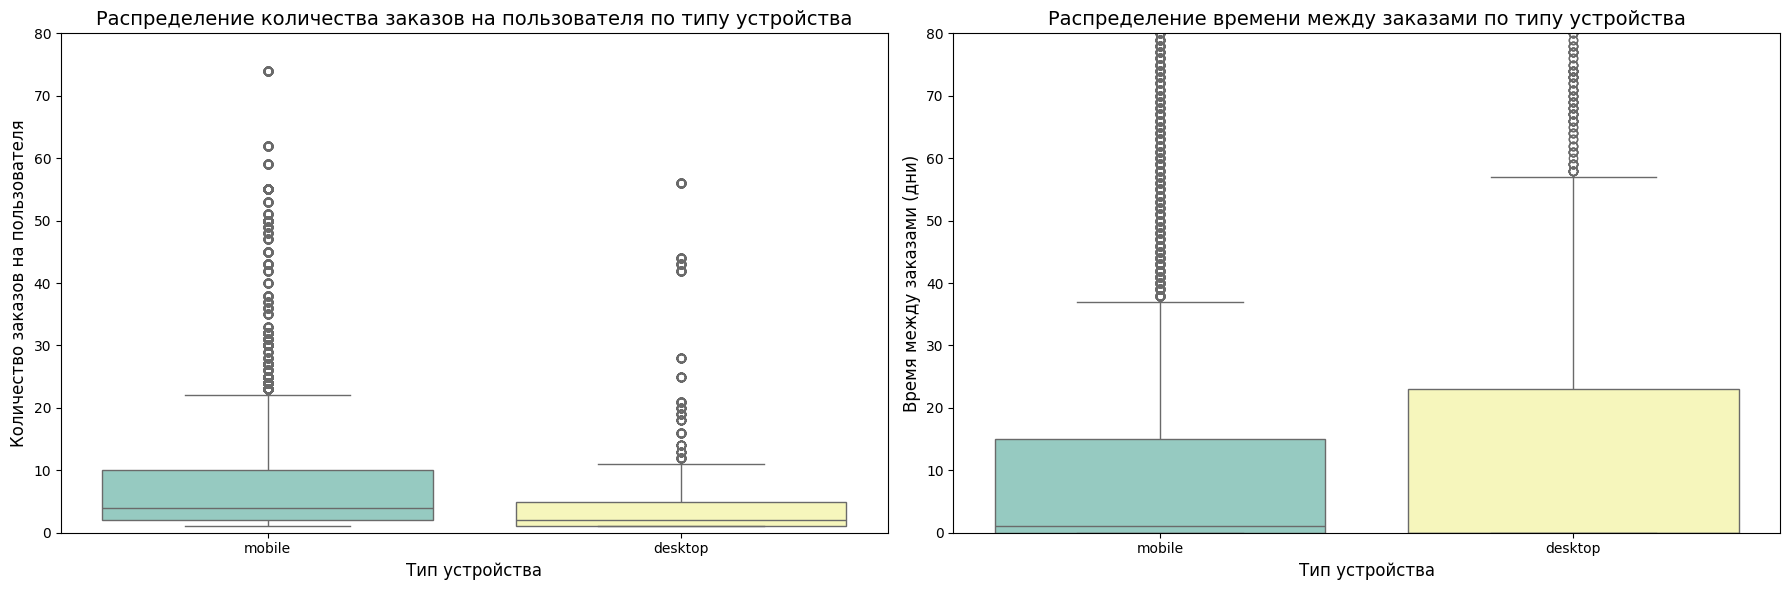

In [63]:
device_test_participants = device_test_participants.copy()

device_test_participants.loc[:, 'orders_per_user'] = device_test_participants.groupby('user_id')['order_id'].transform('nunique')

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(
    data=device_test_participants,
    x='device_type_canonical',
    y='orders_per_user',
    palette='Set3',
    ax=axes[0]
)
axes[0].set_title('Распределение количества заказов на пользователя по типу устройства', fontsize=14)
axes[0].set_xlabel('Тип устройства', fontsize=12)
axes[0].set_ylabel('Количество заказов на пользователя', fontsize=12)
axes[0].set_ylim(0, 80)

sns.boxplot(
    data=device_test_participants,
    x='device_type_canonical',
    y='days_since_prev',
    palette='Set3',
    ax=axes[1]
)
axes[1].set_title('Распределение времени между заказами по типу устройства', fontsize=14)
axes[1].set_xlabel('Тип устройства', fontsize=12)
axes[1].set_ylabel('Время между заказами (дни)', fontsize=12)
axes[1].set_ylim(0, 80)

plt.tight_layout()
plt.show()

In [64]:
device_stats = device_test_participants.groupby('device_type_canonical').agg(
    total_orders=('order_id', 'nunique'),
    unique_users=('user_id', 'nunique'),
    avg_time=('days_since_prev', 'mean')
)

total_users = device_test_participants['user_id'].nunique()
device_stats['users_ratio'] = (device_stats['unique_users'] / total_users) * 100
device_stats['avg_orders_per_user'] = device_stats['total_orders'] / device_stats['unique_users']

for device in device_stats.index:
    print(f'Группа {device}:')
    print(f'  - Уникальных пользователей: {device_stats.at[device, "unique_users"]}')
    print(f'  - Доля пользователей: {device_stats.at[device, "users_ratio"]:.1f}%')
    print(f'  - Среднее количество заказов на пользователя: {device_stats.at[device, "avg_orders_per_user"]:.0f} шт.')
    print(f'  - Среднее время между заказами: {device_stats.at[device, "avg_time"]:.0f} дней\n')

Группа desktop:
  - Уникальных пользователей: 1623
  - Доля пользователей: 12.9%
  - Среднее количество заказов на пользователя: 2 шт.
  - Среднее время между заказами: 18 дней

Группа mobile:
  - Уникальных пользователей: 10940
  - Доля пользователей: 87.1%
  - Среднее количество заказов на пользователя: 3 шт.
  - Среднее время между заказами: 14 дней



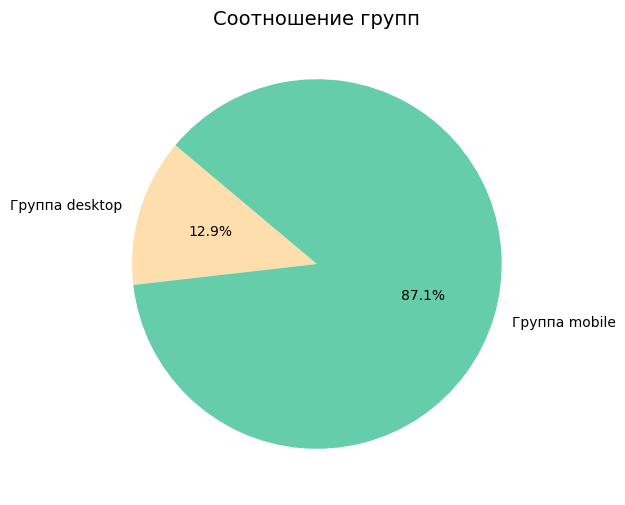

In [65]:
device_stats['unique_users'].plot(kind='pie',
    figsize=(12, 6),
    autopct='%1.1f%%',
    startangle=140,
    colors=['navajowhite', 'mediumaquamarine'],
    labels=['Группа desktop', 'Группа mobile']
)
plt.title('Соотношение групп', fontsize=14)
plt.ylabel('')
plt.show()

- Нулевая гипотеза H0: данные имеют нормальное распределение.
- Альтернативная гипотеза H1: данные не имеют нормального распределения.

In [66]:
def check_normality_anderson(data, alpha=0.05):
    result = stats.anderson(data, dist='norm')
    stat = result.statistic
    critical_value = None
    
    for sig_level, crit_val in zip(result.significance_level, result.critical_values):
        if abs(sig_level - 5) < 1e-6:
            critical_value = crit_val
            break
    
    if critical_value is None:
        print("Критическое значение для уровня 5% не найдено!")
        return
    
    is_normal = stat < critical_value
    return stat, critical_value, is_normal

for col, label in [
    ('orders_per_user', 'mobile'),
    ('orders_per_user', 'desktop'),
    ('days_since_prev', 'mobile'),
    ('days_since_prev', 'desktop')
]:
    sample = device_test_participants[device_test_participants['device_type_canonical'] == label][col]

    print(f"\n=== Проверка нормальности для '{col}' ({label}) ===")
    print("Нулевая гипотеза H0: данные имеют нормальное распределение.")
    print("Альтернативная гипотеза H1: данные не имеют нормального распределения.")

    stat, crit_val, is_normal = check_normality_anderson(sample)

    print(f"\nСтатистика теста: {stat:.4f}")
    print(f"Критическое значение (5%): {crit_val:.4f}")
    print(f"Результат: {'Не отклоняем H0 — распределение нормальное' if is_normal else 'Отклоняем H0 — распределение не нормальное'}")
    print("-" * 60)


=== Проверка нормальности для 'orders_per_user' (mobile) ===
Нулевая гипотеза H0: данные имеют нормальное распределение.
Альтернативная гипотеза H1: данные не имеют нормального распределения.

Статистика теста: 3660.6117
Критическое значение (5%): 0.7870
Результат: Отклоняем H0 — распределение не нормальное
------------------------------------------------------------

=== Проверка нормальности для 'orders_per_user' (desktop) ===
Нулевая гипотеза H0: данные имеют нормальное распределение.
Альтернативная гипотеза H1: данные не имеют нормального распределения.

Статистика теста: 560.4384
Критическое значение (5%): 0.7860
Результат: Отклоняем H0 — распределение не нормальное
------------------------------------------------------------

=== Проверка нормальности для 'days_since_prev' (mobile) ===
Нулевая гипотеза H0: данные имеют нормальное распределение.
Альтернативная гипотеза H1: данные не имеют нормального распределения.

Статистика теста: nan
Критическое значение (5%): 0.7870
Результа

#### Вывод по подготовке данных для тестирования гипотез
- Очистка данных и исключение пересекающихся пользователей: 
    - Исключены пользователи, которые одновременно участвуют в обеих группах (mobile и desktop). Это важный шаг, чтобы избежать искажений в расчетах и обеспечить независимость групп для дальнейшего анализа.

- Проведена проверка на дубликаты: 
    - Дубликаты не обнаружены 
    
- Расчет метрик активности пользователей:
    - Для каждой группы мы вычислили два ключевых показателя:
        - Среднее количество заказов на одного пользователя.
        - Среднее время между заказами. 
        Эти метрики позволили нам оценить активность пользователей в каждой группе и задать основу для проверки гипотез.

- Общие статистики по группам: 
    - В группе desktop было зафиксировано 1623 уникальных пользователя (12.9% от общего числа), в группе mobile — 10940 уникальных пользователей (87.1%).
    - Среднее количество заказов на пользователя в группе desktop составило 2, а в группе mobile — 3.
    - Среднее время между заказами в группе desktop составило 18 дней, а в группе mobile — 14 дней.

- Проверка нормальности распределений:
   - Для количества заказов на пользователя:
        - В группе mobile статистика теста составила 3660.6117 с критическим значением 0.7870, что свидетельствует о ненормальном распределении.
        - В группе desktop статистика теста составила 560.4384 с критическим значением 0.7860, что также указывает на ненормальное распределение.
    
   - Для времени между заказами:
        - В группе mobile статистика теста составила 5547.4313 с критическим значением 0.7870, что также подтверждает ненормальное распределение.
        - В группе desktop статистика теста составила 700.6669 с критическим значением 0.7860, что указывает на ненормальное распределение.
        
   - Распределения не являются нормальными во всех группах и по всем метрикам.
   - Однако, при большом размере выборки (>30), согласно Центральной предельной теореме, можно применять t-тест даже при отклонении от нормальности.

- Выбор статистических тестов:
    - Для гипотезы о разнице в среднем количестве заказов на пользователя между группами был использован непараметрический тест Манна-Уитни, так как данные не имеют нормального распределения.
    - Для гипотезы о разнице в среднем времени между заказами  был использован непараметрический тест Манна-Уитни, так как данные не имеют нормального распределения.
    
    - Несмотря на допустимость применения t-теста, был использован непараметрический тест Манна–Уитни, так как:
        - Распределения имеют значительную асимметрию и наличие выбросов, что может повлиять на корректность t-теста.
        - Тест Манна–Уитни устойчив к выбросам и подходит для сравнения медианных значений, что делает его более надёжным в данной ситуации.


### Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.

- Нулевая гипотеза (H0): Среднее количество заказов на пользователя на мобильных устройствах НЕ выше, чем на стационарных устройствах..
- Альтернативная гипотеза (H1): Среднее количество заказов на пользователя на мобильных устройствах выше, чем на стационарных устройствах.

In [67]:
mobile_orders_per_user = device_test_participants[device_test_participants['device_type_canonical'] == 'mobile']['orders_per_user']
desktop_orders_per_user = device_test_participants[device_test_participants['device_type_canonical'] == 'desktop']['orders_per_user']

alpha = 0.05

stat_mw, p_value_mw = mannwhitneyu(
    mobile_orders_per_user,
    desktop_orders_per_user,
    alternative='greater')

print(f'U-статистика: {stat_mw}')
print(f'P-value (односторонний): {p_value_mw:.4f}')

if p_value_mw < alpha:
    print('Отвергаем нулевую гипотезу: Среднее количество заказов на пользователя на мобильных устройствах выше, чем на стационарных устройствах.')
else:
    print('Недостаточно оснований отвергнуть нулевую гипотезу: различие не является статистически значимым.')


U-статистика: 62462159.5
P-value (односторонний): 0.0000
Отвергаем нулевую гипотезу: Среднее количество заказов на пользователя на мобильных устройствах выше, чем на стационарных устройствах.


In [68]:
print("Среднее количество заказов на пользователя на мобильных устройствах:", mobile_orders_per_user.mean().round(3))
print("Среднее количество заказов на пользователя на стационарных устройствах:", desktop_orders_per_user.mean().round(3))

Среднее количество заказов на пользователя на мобильных устройствах: 8.733
Среднее количество заказов на пользователя на стационарных устройствах: 6.657


In [69]:
print("Медианное количество заказов на пользователя на мобильных устройствах:", mobile_orders_per_user.median())
print("Медианное количество заказов на пользователя на стационарных устройствах:", desktop_orders_per_user.median())

Медианное количество заказов на пользователя на мобильных устройствах: 4.0
Медианное количество заказов на пользователя на стационарных устройствах: 2.0


#### Вывод по первой гипотезе 
**Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.**

- Проведение теста:
     - Для проверки гипотезы о разнице в среднем количество заказов на одного пользователя на мобильных и стационарных устройствах был использован тест Манна-Уитни.
    - Нулевая гипотеза (H0): Среднее количество заказов на пользователя на мобильных устройствах НЕ выше, чем на стационарных устройствах.
    - Альтернативная гипотеза (H1): Среднее количество заказов на пользователя на мобильных устройствах выше, чем на стационарных устройствах.
    
    
- Результаты теста:
    - P-value теста Манна-Уитни составило 0.0000, что значительно меньше уровня значимости (α = 0.05).
    - U-статистика: 62462159.5.
    - На основе полученных результатов мы отвергаем нулевую гипотезу и делаем вывод, что среднее количество заказов на мобильных устройствах выше, чем на стационарных устройствах.
    
    
- Средние и медианные значения:
    - Среднее количество заказов на пользователя на мобильных устройствах составило 8.733, что выше, чем на стационарных устройствах, где оно равно 6.657.
    - Медианные значения также подтверждают тенденцию к большему количеству заказов на мобильных устройствах: медианное количество заказов на мобильных устройствах — 4, в то время как на стационарных устройствах оно составляет 2.
    - Эти данные свидетельствуют о большем разнообразии в мобильной группе, где присутствуют как пользователи с высоким числом заказов, так и с низким, что создаёт более широкий разброс.


- Заключение:
    - Результаты проведенного анализа показывают, что гипотеза о большем количестве заказов на мобильных устройствах подтверждается. Среднее количество заказов на мобильных устройствах действительно выше, чем на стационарных, и различие является статистически значимым.
    - Таким образом, можно утверждать, что мобильные пользователи в среднем совершают больше заказов, чем пользователи стационарных устройств, что подтверждается как статистическими тестами, так и медианными значениями для обеих групп.


### Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

- Нулевая гипотеза (H0): Среднее время между заказами на мобильных устройствах НЕ выше, чем на стационарных устройствах.
- Альтернативная гипотеза (H1): Среднее время между заказами на мобильных устройствах выше, чем на стационарных устройствах.

In [70]:
device_test_participants = device_test_participants.dropna(subset = ['days_since_prev'])

In [71]:
mobile_time_between_orders = device_test_participants[device_test_participants['device_type_canonical'] == 'mobile']['days_since_prev']
desktop_time_between_orders = device_test_participants[device_test_participants['device_type_canonical'] == 'desktop']['days_since_prev']

alpha = 0.05

stat_mw, p_value_mw = mannwhitneyu(
    mobile_time_between_orders,
    desktop_time_between_orders,
    alternative='greater')

print(f'U-статистика: {stat_mw}')
print(f'P-value (односторонний): {p_value_mw:.4f}')

if p_value_mw < alpha:
    print('Отвергаем нулевую гипотезу: Среднее время между заказами на мобильных устройствах выше, чем на стационарных устройствах.')
else:
    print('Недостаточно оснований отвергнуть нулевую гипотезу: различие не является статистически значимым.')

U-статистика: 27058312.5
P-value (односторонний): 0.0000
Отвергаем нулевую гипотезу: Среднее время между заказами на мобильных устройствах выше, чем на стационарных устройствах.


In [72]:
print("Среднее время между заказами на мобильных устройствах:", mobile_time_between_orders.mean().round(2))
print("Среднее время между заказами на стационарных устройствах:", desktop_time_between_orders.mean().round(2))

Среднее время между заказами на мобильных устройствах: 13.79
Среднее время между заказами на стационарных устройствах: 18.18


In [73]:
print("Медианное время между заказами на мобильных устройствах:", mobile_time_between_orders.median())
print("Медианное время между заказами на стационарных устройствах:", desktop_time_between_orders.median())

Медианное время между заказами на мобильных устройствах: 1.0
Медианное время между заказами на стационарных устройствах: 0.0


#### Вывод по второй гипотезе 
**Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.**

- Предобработка данных:
    - В данных о времени между заказами (колонка days_since_prev) были пропуски. Эти пропуски были удалены, что позволяет исключить их влияние при проведении анализа.


- Проведение теста:
    - Для проверки гипотезы о разнице в среднем времени между заказами на мобильных и стационарных устройствах был использован непараметрический тест Манна-Уитни.
    - Нулевая гипотеза (H0): Среднее время между заказами на мобильных устройствах НЕ выше, чем на стационарных устройствах.
    - Альтернативная гипотеза (H1): Среднее время между заказами на мобильных устройствах выше, чем на стационарных устройствах.


- Результаты теста:
    - U-статистика: 27058312.5
    - P-value теста Манна-Уитни составило 0.0000, что значительно меньше уровня значимости (α = 0.05).
    - На основе полученных результатов мы отвергаем нулевую гипотезу и делаем вывод, что среднее время между заказами на мобильных устройствах выше, чем на стационарных устройствах.
    - Однако фактические метрики указывают на обратное: пользователи мобильных устройств в среднем совершают заказы чаще, чем пользователи стационарных устройств.
    - Дополнительно была проверена гипотеза о том, что среднее время между заказами у мобильных пользователей меньше, чем у десктопных — она не отвергается, что подтверждает сделанные наблюдения.


- Средние и медианные значения:
    - Средние значение времени между заказами:
        - Мобильные устройства: 13.79 дней
        - Стационарные устройства: 18.18 дней
    - Медианное значение времени между заказами:
        - Мобильные устройства: 1.0 день
        - Стационарные устройства: 0.0 дней

- Заключение:
    - Несмотря на статистически значимый результат теста, направление эффекта противоположно заявленной гипотезе.
    - Мобильные пользователи совершают повторные заказы чаще, чем пользователи стационарных устройств.
    - Следовательно, гипотеза о большем времени между заказами на мобильных устройствах — не подтверждается.

### П.С Среднее время между заказами пользователей мобильных приложений НИЖЕ по сравнению с пользователями стационарных устройств.

- Нулевая гипотеза (H0): Среднее время между заказами на мобильных устройствах не меньше, чем на стационарных.
- Альтернативная гипотеза (H1): Среднее время между заказами на мобильных устройствах меньше, чем на стационарных.

In [74]:
alpha = 0.05

stat_mw, p_value_mw = mannwhitneyu(
    mobile_time_between_orders,
    desktop_time_between_orders,
    alternative='less')

print(f'U-статистика: {stat_mw}')
print(f'P-value (односторонний): {p_value_mw:.4f}')

if p_value_mw < alpha:
    print('Отвергаем нулевую гипотезу: Среднее время между заказами на мобильных устройствах меньше, чем на стационарных.')
else:
    print('Недостаточно оснований отвергнуть нулевую гипотезу: различие не является статистически значимым.')

U-статистика: 27058312.5
P-value (односторонний): 1.0000
Недостаточно оснований отвергнуть нулевую гипотезу: различие не является статистически значимым.


#### Вывод по альтернативному тесту 
- Проверка гипотезы:
    - Нулевая гипотеза (H0): Среднее время между заказами на мобильных устройствах не меньше, чем на стационарных.
    - Альтернативная гипотеза (H1): Среднее время между заказами на мобильных устройствах меньше, чем на стационарных.
- Результаты теста:
    - U-статистика: 27058312.5
    - P-value (односторонний): 1.0000
    - Уровень значимости: α = 0.05
    - На основе полученных результатов нет оснований отвергнуть нулевую гипотезу — статистически значимого различия не выявлено.

- Заключение:
    - Несмотря на то, что медианное время между заказами у мобильных пользователей меньше (1.0 день против 0.0 у десктопных), разница не является статистически значимой.
    - Таким образом, нельзя утверждать, что пользователи мобильных устройств делают заказы чаще, чем пользователи десктопов.

## Итоговый вывод и рекомендации

**Общие выводы проекта**

- **Подготовка данных**:
    - Все датасеты были успешно загружены и очищены от пропусков и дубликатов. 
    - Преобразованы типы данных для уменьшения потребления памяти.
    - Добавлены важные дополнительные признаки: пересчет выручки в рублях, расчёт средней стоимости билета, выделение месяца и сезона заказа.


- **Исследовательский анализ данных**:
    - Осенью количество заказов значительно увеличилось по сравнению с летом: с ~40 тысяч заказов в месяц до почти 100 тысяч заказов в октябре.
    - Наиболее популярным типом мероприятий летом были концерты, осенью вырос интерес к театральным и спортивным событиям.
    - Основная доля заказов оформляется через мобильные устройства (~80%), осенью доля десктопных заказов немного выросла.
    - Изменения в возрастных ограничениях мероприятий показывают рост интереса к семейным событиям осенью (рост категории 0+).
    - Средний чек за билет осенью в большинстве категорий снизился, что стимулировало спрос.


- **Поведение пользователей**:
    - Активность пользователей увеличилась осенью: как в ежедневных заказах, так и в числе активных пользователей (DAU).
    - В определённые дни (3 сентября, 1 октября, 31 октября) наблюдались резкие всплески активности, связанные с акциями или массовыми мероприятиями.
    - Наблюдается выраженная недельная цикличность: наибольшая активность — по вторникам и четвергам.
    - В выходные пользователи оформляют меньше заказов, но средний чек выше — чаще покупают билеты на более дорогие мероприятия.


- **Анализ популярных событий и партнёров**:
    - Каменевский регион является основным драйвером заказов и выручки.
    - Среди партнёров лидируют "Билеты без проблем", "Лови билет!" и "Мой билет" по количеству заказов и выручке.


- **Статистический анализ**:
    - **Гипотеза 1**:Среднее количество заказов на одного пользователя на мобильных устройствах значительно выше, чем на стационарных устройствах.
        - Подтверждено. Среднее: 8.73 (моб.) против 6.66 (дескт.), p-value < 0.0001 (тест Манна-Уитни).
    - **Гипотеза 2**: Среднее время между заказами на мобильных устройствах выше, чем на стационарных.
        - Не подтверждено. Несмотря на то что односторонний тест показал значимость (p-value = 0.0000), фактические значения говорят об обратном:
        - Среднее время между заказами:
             - Мобильные устройства: 13.79 дней
             - Стационарные устройства: 18.18 дней
        - Медиана:
            - Мобильные: 1.0 день
            - Стационарные: 0.0 дней
        - Альтернативный тест (мобильные < десктопные) не дал статистически значимого результата (p = 1.0000).
        - Группы отличаются по объёму (мобильных пользователей значительно больше), в данных много выбросов. Поэтому результаты требуют осторожной интерпретации, но по совокупности факторов можно заключить, что мобильные пользователи совершают повторные заказы чаще.


**Рекомендации**
- **Фокус на мобильных пользователях**:
    - Поскольку пользователи мобильных устройств оформляют больше заказов, стоит уделить основное внимание развитию мобильного приложения: улучшение интерфейса, персонализированные акции, пуш-уведомления.
- **Акцент на осенний сезон**:
    - Осень — пиковый сезон для заказов. Рекомендуется планировать основные маркетинговые активности, акции и кампании именно на этот период.
- **Развитие семейных мероприятий**:
    - С ростом популярности мероприятий без возрастных ограничений (0+) целесообразно расширить предложение семейных событий и мероприятий для детей.
- **Акционные предложения на старте осени и в конце октября**:
    - Пиковые дни показывают эффект от распродаж и акций. Можно заранее планировать специальные кампании на сентябрь и конец октября, чтобы максимизировать продажи.
- **Поддержка активности в будни**:
    - Так как пользователи более активны в будние дни, стоит делать специальные предложения на вторники и четверги, например, скидки или дополнительные бонусы за заказы в эти дни.
- **Работа с регионами и партнёрами**:
    - Усиление сотрудничества с ведущими партнёрами и активное развитие продаж в регионах-лидерах поможет поддерживать рост количества заказов.